In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bid_ask.csv to bid_ask (8).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('use_inf_as_na', True)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [ ]:
liq_data = pd.read_csv('bid_ask.csv')

Affiche les premières lignes de la base de données.

In [ ]:
liq_data.head()

,Unnamed: 0,Date,EXCHCD,TICKER,COMNAM,BIDLO,ASKHI,PRC,VOL,RET,SHROUT,OPENPRC,vwretx
0,1031570,2019-01-02,3.0,INTC,INTEL CORP,45.77,47.470,47.08,18761673.0,0.003196,4564000.0,45.960,0.001783
1,1031571,2019-01-03,3.0,INTC,INTEL CORP,44.39,46.280,44.49,32254097.0,-0.055013,4564000.0,46.150,-0.021219
2,1031572,2019-01-04,3.0,INTC,INTEL CORP,45.54,47.570,47.22,35419836.0,0.061362,4564000.0,45.835,0.033399
3,1031573,2019-01-07,3.0,INTC,INTEL CORP,46.75,47.995,47.44,22724997.0,0.004659,4564000.0,47.100,0.009191
4,1031574,2019-01-08,3.0,INTC,INTEL CORP,46.78,48.030,47.74,22721240.0,0.006324,4564000.0,47.800,0.010240


Ce code utilise les bibliothèques Matplotlib et Seaborn pour créer un graphique de type violon (violin plot) qui montre la distribution de la variable 'Unnamed: 0' en fonction de chaque valeur unique de 'COMNAM' dans le DataFrame liq_data. Le graphique affiche également un graphique de boîte (boxplot) à l'intérieur de chaque violon. Enfin, il supprime les bords du graphique pour améliorer son apparence.

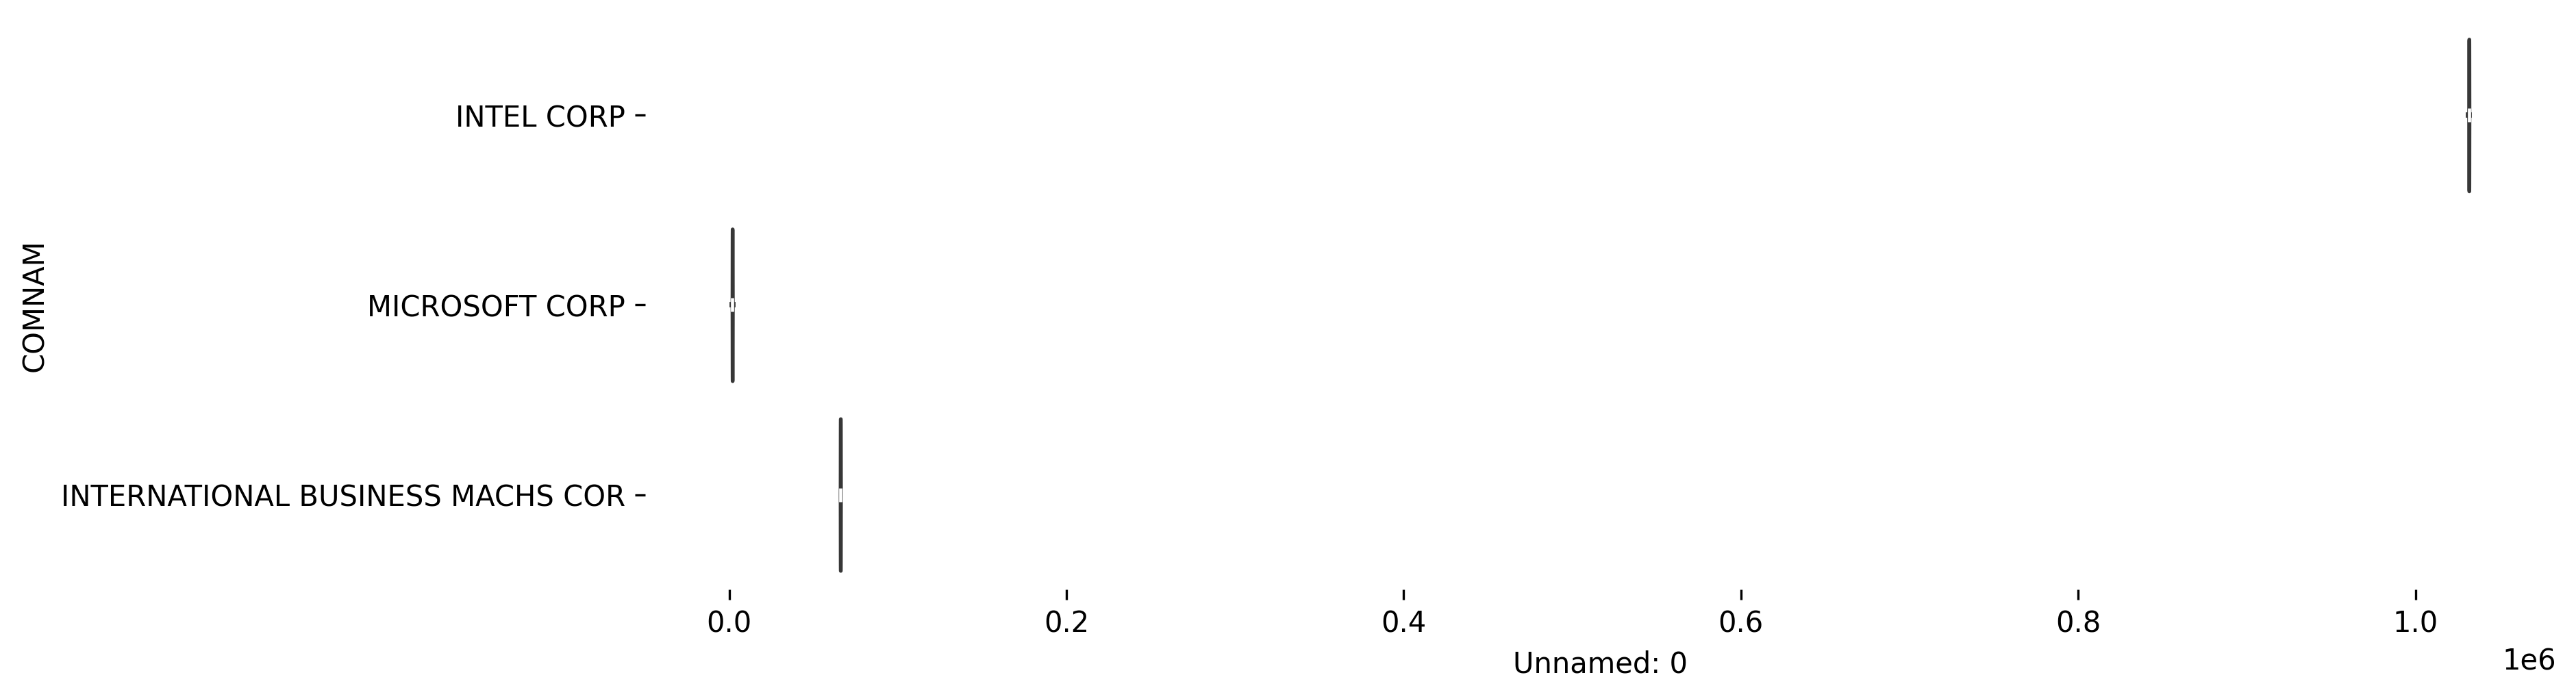

In [ ]:
# @title COMNAM vs Unnamed: 0

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(liq_data['COMNAM'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(liq_data, x='Unnamed: 0', y='COMNAM', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Ce code crée une liste appelée rolling_five et remplit cette liste avec des agrégations de données sur des fenêtres roulantes de cinq jours pour chaque ticker unique dans le DataFrame liq_data

In [ ]:
rolling_five = []

for j in liq_data.TICKER.unique():
    for i in range(len(liq_data[liq_data.TICKER == j])):
        rolling_five.append(liq_data[i:i+5].agg({'BIDLO': 'min',
                                                'ASKHI': 'max',
                                                 'VOL': 'sum',
                                                 'SHROUT': 'mean',
                                                 'PRC': 'mean'}))

Ce code crée un nouveau DataFrame appelé rolling_five_df à partir de la liste rolling_five qui a été remplie précédemment. Ensuite, il renomme les colonnes de ce DataFrame avec les noms appropriés. Enfin, il concatène ce nouveau DataFrame avec le DataFrame liq_data le long de l'axe des colonnes.

In [ ]:
rolling_five_df = pd.DataFrame(rolling_five)
rolling_five_df.columns = ['bidlo_min', 'askhi_max', 'vol_sum',
                           'shrout_mean', 'prc_mean']
liq_vol_all = pd.concat([liq_data,rolling_five_df], axis=1)

## Volume Based Measure

Ce code calcule les ratios de liquidité pour chaque ticker unique dans le DataFrame liq_vol_all.

In [ ]:
liq_ratio = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        liq_ratio.append((liq_vol_all['PRC'][i+1:i+6] *
                          liq_vol_all['VOL'][i+1:i+6]).sum()/
                         (np.abs(liq_vol_all['PRC'][i+1:i+6].mean() -
                                 liq_vol_all['PRC'][i:i+5].mean())))


print ("Liquidity Ratios:", liq_ratio)

Liquidity Ratios: [34154350057.203007, 7663219549.275251, 16457720701.22779, 30099586322.198624, 31887776308.372643, 221635499376.65826, 269105052703.8787, 100959082583.44852, 348382917486.1337, 40845182056.212776, 21445833439.96929, 35710432425.59423, 21011934240.443756, 29319096924.855183, 131446571676.49113, 18984929238.863686, 23014757698.757328, 14199786157.410288, 11141384880.461166, 15956411817.754192, 16292695524.431393, 271507868451.2949, 64704734311.224884, inf, 43499701093.15896, 14172669088.670774, 8370542049.574468, 8828572182.50957, 17580472102.970802, 25476786893.299477, 16596004234.612818, 19144217526.006218, 15214064769.617794, 14581970677.567667, 17866866968.032124, 29883190103.39524, 29247895505.05842, 57642593127.33569, 86742742158.62094, 69558203738.89311, 29945279552.925262, 40254959898.1373, 215144316921.30917, 18804443749.330585, 34599217833.39154, 20147999032.9735, 48826018079.998146, 60003199854.17149, 64729629151.45906, 28086269297.416435, 25043390200.51418, 

Ce code calcule les ratios de Hui-Heubel pour chaque ticker unique dans le DataFrame liq_vol_all

In [ ]:
Lhh = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        Lhh.append((liq_vol_all['PRC'][i:i+5].max() -
                    liq_vol_all['PRC'][i:i+5].min()) /
                   liq_vol_all['PRC'][i:i+5].min() /
                   (liq_vol_all['VOL'][i:i+5].sum() /
                    liq_vol_all['SHROUT'][i:i+5].mean() *
                    liq_vol_all['PRC'][i:i+5].mean()))

print("Hui-Heubel Ratios:", Lhh)

Hui-Heubel Ratios: [5.4024581663729704e-05, 5.665557163009714e-05, 2.0749935167625525e-05, 2.5472889843670817e-05, 2.076878565643746e-05, 1.594713952983529e-05, 1.4266347203609837e-05, 1.566618858625864e-05, 1.9172759816354947e-05, 1.805089989621691e-05, 2.2103135057243457e-05, 2.490784310863658e-05, 2.5648848384016036e-05, 2.836638316690825e-05, 3.0894869091685994e-05, 2.9741507609185796e-05, 9.644520345476118e-06, 2.7239738260957116e-05, 3.631471450656906e-05, 3.558959728896656e-05, 3.645546006432933e-05, 1.7165406285575803e-05, 1.8054273156542514e-05, 1.9665788660400718e-05, 2.222105975185394e-05, 3.159039360415059e-05, 4.1987082641753605e-05, 5.651373906598263e-05, 3.1966769571250074e-05, 2.1865576152556387e-05, 1.5712227018256632e-05, 1.729780674094262e-05, 2.719340225415837e-05, 2.8921039817093825e-05, 2.96659462270741e-05, 1.1585476542418926e-05, 5.963197382089611e-06, 1.694353662650688e-05, 1.6048298104138362e-05, 1.6726320631203725e-05, 2.2896299374888038e-05, 2.55060620668939

Ce code calcule les ratios de rotation pour chaque ticker dans le DataFrame liq_vol_all en utilisant les volumes et les SHROUT sur une journée, puis stocke ces ratios dans la liste turnover_ratio et les affiche ensuite.

In [ ]:
turnover_ratio = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        turnover_ratio.append((1/liq_vol_all['VOL'].count()) *
                              (np.sum(liq_vol_all['VOL'][i:i+1]) /
                               np.sum(liq_vol_all['SHROUT'][i:i+1])))

print("Turnover Ratios:", turnover_ratio)

Turnover Ratios: [0.005437560862790924, 0.009347973153133099, 0.010265476538263566, 0.006586222576965345, 0.006585133712653432, 0.006534226625210412, 0.007879028826936363, 0.006297586297641074, 0.005560630353027373, 0.006507803189442102, 0.005521677297367481, 0.005051272264188565, 0.008656303182486355, 0.007516734948921628, 0.005493709106000956, 0.014658569017245614, 0.025428533190263232, 0.010566157567714162, 0.006158380131139748, 0.007919901921680884, 0.012641207012788067, 0.01099519785677224, 0.006138746818866898, 0.009282575803033885, 0.006362317088523448, 0.008180460989277978, 0.0055360290164048215, 0.005292237152810868, 0.005297644637871456, 0.005200970841231015, 0.0051450129010169035, 0.0066141298784727735, 0.00457991159303145, 0.006348096261705335, 0.004747856889896027, 0.00938837120102408, 0.006087318647469859, 0.004725346880283504, 0.005171616174451397, 0.005405343715328149, 0.005395641185834648, 0.006388252073987008, 0.006188148065788715, 0.004329159474923318, 0.005314345954

Ce code ajoute trois nouvelles colonnes contenant les ratios de liquidité, les ratios de Hui-Heubel et les ratios de rotation (turnover) calculés aux données existantes dans le DataFrame liq_vol_all

In [ ]:
liq_vol_all['liq_ratio'] = pd.DataFrame(liq_ratio)
liq_vol_all['Lhh'] = pd.DataFrame(Lhh)
liq_vol_all['turnover_ratio'] = pd.DataFrame(turnover_ratio)

 Ce code agrège les données de liq_vol_all par ticker et calcule les moyennes des ratios de liquidité, des ratios de Hui-Heubel et des ratios de rotation, puis affiche le tableau récapitulatif de ces moyennes.

In [ ]:
import pandas as pd
import numpy as np

# Initialiser les listes vides pour stocker les ratios pour IBM
ibm_liq_ratio = []
ibm_Lhh = []
ibm_turnover_ratio = []

# Filtrer les données pour IBM
ibm_data = liq_vol_all[liq_vol_all['TICKER'] == 'IBM']

# Boucler sur les données d'IBM pour calculer les ratios
for i in range(len(ibm_data) - 5):
    # Calculer le ratio de liquidité
    liq_ratio = (ibm_data['PRC'].iloc[i+1:i+6] * ibm_data['VOL'].iloc[i+1:i+6]).sum() / \
                (np.abs(ibm_data['PRC'].iloc[i+1:i+6].mean() - ibm_data['PRC'].iloc[i:i+5].mean()))
    ibm_liq_ratio.append(liq_ratio)

    # Calculer le ratio Hui-Heubel
    Lhh = (ibm_data['PRC'].iloc[i:i+5].max() - ibm_data['PRC'].iloc[i:i+5].min()) / \
          ibm_data['PRC'].iloc[i:i+5].min() / \
          (ibm_data['VOL'].iloc[i:i+5].sum() / (ibm_data['SHROUT'].iloc[i:i+5].mean() * ibm_data['PRC'].iloc[i:i+5].mean()))
    ibm_Lhh.append(Lhh)

    # Calculer le turnover ratio
    turnover_ratio = (1 / ibm_data['VOL'].iloc[i:i+5].count()) * \
                     (ibm_data['VOL'].iloc[i] / ibm_data['SHROUT'].iloc[i])
    ibm_turnover_ratio.append(turnover_ratio)

# Afficher les ratios pour IBM
print("Liquidity Ratios for IBM:", ibm_liq_ratio)
print("Hui-Heubel Ratios for IBM:", ibm_Lhh)
print("Turnover Ratios for IBM:", ibm_turnover_ratio)

# Calculer et afficher la moyenne pour chaque ratio
ibm_liq_ratio_mean = np.mean(ibm_liq_ratio)
ibm_Lhh_mean = np.mean(ibm_Lhh)
ibm_turnover_ratio_mean = np.mean(ibm_turnover_ratio)

print("Mean Liquidity Ratio for IBM:", ibm_liq_ratio_mean)
print("Mean Hui-Heubel Ratio for IBM:", ibm_Lhh_mean)
print("Mean Turnover Ratio for IBM:", ibm_turnover_ratio_mean)

Liquidity Ratios for IBM: [2252453947.2992916, 1381815105.090093, 2875473997.8743362, 5730348375.33509, 6377274221.421128, 13182645154.139286, 32379707100.875687, 6106421805.614298, 8179203815.539869, 2683417009.986577, 2914853268.6205287, 2763318183.2088013, 3103247496.6411858, 2510925791.2235146, 12092616239.429459, 9053263064.894518, 121827422286.3553, 16220748206.524511, 12458204816.7247, 7990075162.645919, 12304679579.8675, 37834970037.51606, 11790063837.023489, 25490696509.58275, 10286549569.585098, 3444089771.901788, 2734079848.2527323, 2565954828.959341, 6385891448.512579, 36101871568.128975, 4265965704.2238107, 7965702503.065151, 10961814500.497673, 8819537917.356974, 36836132376.23927, 212469535612.35422, 10441052825.953648, 6275494116.950225, 5334115811.31939, 4420082865.77224, 3086053391.5058656, 18108737729.141106, 32104444911.059605, 8319099899.5107155, 3526168831.741823, 3348615052.258755, 5644716124.900339, 6255044242.047947, 13627418665.822111, 5593119092.788635, 62660

In [ ]:
import pandas as pd
import numpy as np

# Initialiser les listes vides pour stocker les ratios pour INTC
intc_liq_ratio = []
intc_Lhh = []
intc_turnover_ratio = []

# Filtrer les données pour INTC
intc_data = liq_vol_all[liq_vol_all['TICKER'] == 'INTC']

# Boucler sur les données d'INTC pour calculer les ratios
for i in range(len(intc_data) - 5):
    # Calculer le ratio de liquidité
    liq_ratio = (intc_data['PRC'].iloc[i+1:i+6] * intc_data['VOL'].iloc[i+1:i+6]).sum() / \
                (np.abs(intc_data['PRC'].iloc[i+1:i+6].mean() - intc_data['PRC'].iloc[i:i+5].mean()))
    intc_liq_ratio.append(liq_ratio)

    # Calculer le ratio Hui-Heubel
    Lhh = (intc_data['PRC'].iloc[i:i+5].max() - intc_data['PRC'].iloc[i:i+5].min()) / \
          intc_data['PRC'].iloc[i:i+5].min() / \
          (intc_data['VOL'].iloc[i:i+5].sum() / (intc_data['SHROUT'].iloc[i:i+5].mean() * intc_data['PRC'].iloc[i:i+5].mean()))
    intc_Lhh.append(Lhh)

    # Calculer le turnover ratio
    turnover_ratio = (1 / intc_data['VOL'].iloc[i:i+5].count()) * \
                     (intc_data['VOL'].iloc[i] / intc_data['SHROUT'].iloc[i])
    intc_turnover_ratio.append(turnover_ratio)

# Afficher les ratios pour INTC
print("Liquidity Ratios for INTC:", intc_liq_ratio)
print("Hui-Heubel Ratios for INTC:", intc_Lhh)
print("Turnover Ratios for INTC:", intc_turnover_ratio)

# Calculer et afficher la moyenne pour chaque ratio
intc_liq_ratio_mean = np.mean(intc_liq_ratio)
intc_Lhh_mean = np.mean(intc_Lhh)
intc_turnover_ratio_mean = np.mean(intc_turnover_ratio)

print("Mean Liquidity Ratio for INTC:", intc_liq_ratio_mean)
print("Mean Hui-Heubel Ratio for INTC:", intc_Lhh_mean)
print("Mean Turnover Ratio for INTC:", intc_turnover_ratio_mean)


Liquidity Ratios for INTC: [34154350057.203007, 7663219549.275251, 16457720701.22779, 30099586322.198624, 31887776308.372643, 221635499376.65826, 269105052703.8787, 100959082583.44852, 348382917486.1337, 40845182056.212776, 21445833439.96929, 35710432425.59423, 21011934240.443756, 29319096924.855183, 131446571676.49113, 18984929238.863686, 23014757698.757328, 14199786157.410288, 11141384880.461166, 15956411817.754192, 16292695524.431393, 271507868451.2949, 64704734311.224884, inf, 43499701093.15896, 14172669088.670774, 8370542049.574468, 8828572182.50957, 17580472102.970802, 25476786893.299477, 16596004234.612818, 19144217526.006218, 15214064769.617794, 14581970677.567667, 17866866968.032124, 29883190103.39524, 29247895505.05842, 57642593127.33569, 86742742158.62094, 69558203738.89311, 29945279552.925262, 40254959898.1373, 215144316921.30917, 18804443749.330585, 34599217833.39154, 20147999032.9735, 48826018079.998146, 60003199854.17149, 64729629151.45906, 28086269297.416435, 2504339020

In [ ]:
import pandas as pd
import numpy as np

# Initialiser les listes vides pour stocker les ratios pour MSFT
msft_liq_ratio = []
msft_Lhh = []
msft_turnover_ratio = []

# Filtrer les données pour MSFT
msft_data = liq_vol_all[liq_vol_all['TICKER'] == 'MSFT']

# Boucler sur les données de MSFT pour calculer les ratios
for i in range(len(msft_data) - 5):
    # Calculer le ratio de liquidité
    liq_ratio = (msft_data['PRC'].iloc[i+1:i+6] * msft_data['VOL'].iloc[i+1:i+6]).sum() / \
                (np.abs(msft_data['PRC'].iloc[i+1:i+6].mean() - msft_data['PRC'].iloc[i:i+5].mean()))
    msft_liq_ratio.append(liq_ratio)

    # Calculer le ratio Hui-Heubel
    Lhh = (msft_data['PRC'].iloc[i:i+5].max() - msft_data['PRC'].iloc[i:i+5].min()) / \
          msft_data['PRC'].iloc[i:i+5].min() / \
          (msft_data['VOL'].iloc[i:i+5].sum() / (msft_data['SHROUT'].iloc[i:i+5].mean() * msft_data['PRC'].iloc[i:i+5].mean()))
    msft_Lhh.append(Lhh)

    # Calculer le turnover ratio
    turnover_ratio = (1 / msft_data['VOL'].iloc[i:i+5].count()) * \
                     (msft_data['VOL'].iloc[i] / msft_data['SHROUT'].iloc[i])
    msft_turnover_ratio.append(turnover_ratio)

# Afficher les ratios pour MSFT
print("Liquidity Ratios for MSFT:", msft_liq_ratio)
print("Hui-Heubel Ratios for MSFT:", msft_Lhh)
print("Turnover Ratios for MSFT:", msft_turnover_ratio)

# Calculer et afficher la moyenne pour chaque ratio
msft_liq_ratio_mean = np.mean(msft_liq_ratio)
msft_Lhh_mean = np.mean(msft_Lhh)
msft_turnover_ratio_mean = np.mean(msft_turnover_ratio)

print("Mean Liquidity Ratio for MSFT:", msft_liq_ratio_mean)
print("Mean Hui-Heubel Ratio for MSFT:", msft_Lhh_mean)
print("Mean Turnover Ratio for MSFT:", msft_turnover_ratio_mean)


Liquidity Ratios for MSFT: [29968722094.98502, 14393246424.871027, 93484385912.52519, 7763852350793.094, 35298054052.284485, 69283399799.69092, 30316423047.55837, 16702857333.13671, 23309191079.600582, 48150192686.85045, 95645410627.50743, 76279269712.0499, 28678520413.08083, 27193872550.837917, 263648797221.92172, 58619899108.983185, 23983620666.104774, 161152335098.4961, 24489383906.681583, 255468223260.01215, 90491641201.12753, 23906515761.55697, 127528651676.04024, 185535128265.90204, 77098217170.96564, 34436042899.53907, 23211481838.705654, 20200019826.832577, 219913542156.1255, 24326169984.500183, 16462653074.201618, 19543375040.07358, 16279441631.563366, 13681199679.422436, 26362854645.896904, 42878147041.21828, 102346532446.18292, 102102917244.46584, 155298536756.30365, 38401366839.42039, 30874568867.747803, 109426775222.11476, 34561074529.21999, 27928983492.216885, 19139226500.511826, 18417664691.54657, 21699767712.552246, 27312971253.474033, 35186057586.35849, 18932052783.081

## Transaction Cost Based Measures

### Bid-Ask Spreads

Ce code calcule le prix médian ainsi que deux pourcentages d'écart (coté et effectif) pour chaque entrée du DataFrame liq_vol_all et les affiche

In [ ]:
liq_vol_all['mid_price'] = (liq_vol_all.ASKHI + liq_vol_all.BIDLO) / 2
#prix demandé le plus élevé (ASKHI), prix offert le plus bas (BIDLO), prix médian (mid_price)

#Pourcentage de l'écart coté
liq_vol_all['percent_quoted_ba'] = (liq_vol_all.ASKHI -
                                    liq_vol_all.BIDLO) / \
                                    liq_vol_all.mid_price
#Pourcentage de l'écart effectif
liq_vol_all['percent_effective_ba'] = 2 * abs((liq_vol_all.PRC -
                                               liq_vol_all.mid_price)) / \
                                               liq_vol_all.mid_price

print(liq_vol_all[['mid_price', 'percent_quoted_ba', 'percent_effective_ba']])

      mid_price  percent_quoted_ba  percent_effective_ba
0     46.620000           0.036465              0.019734
1     45.335000           0.041690              0.037278
2     46.555000           0.043604              0.028568
3     47.372500           0.026281              0.002850
4     47.405000           0.026369              0.014134
..          ...                ...                   ...
751  135.115000           0.007475              0.001998
752  134.977745           0.004856              0.001004
753  135.310000           0.006504              0.000591
754  133.900000           0.020911              0.016281
755  133.259995           0.012907              0.011706

[756 rows x 3 columns]


Ce code trace un graphique comparant les spreads bid-ask coté et effectif pour le ticker IBM, en utilisant les données filtrées du DataFrame liq_vol_all

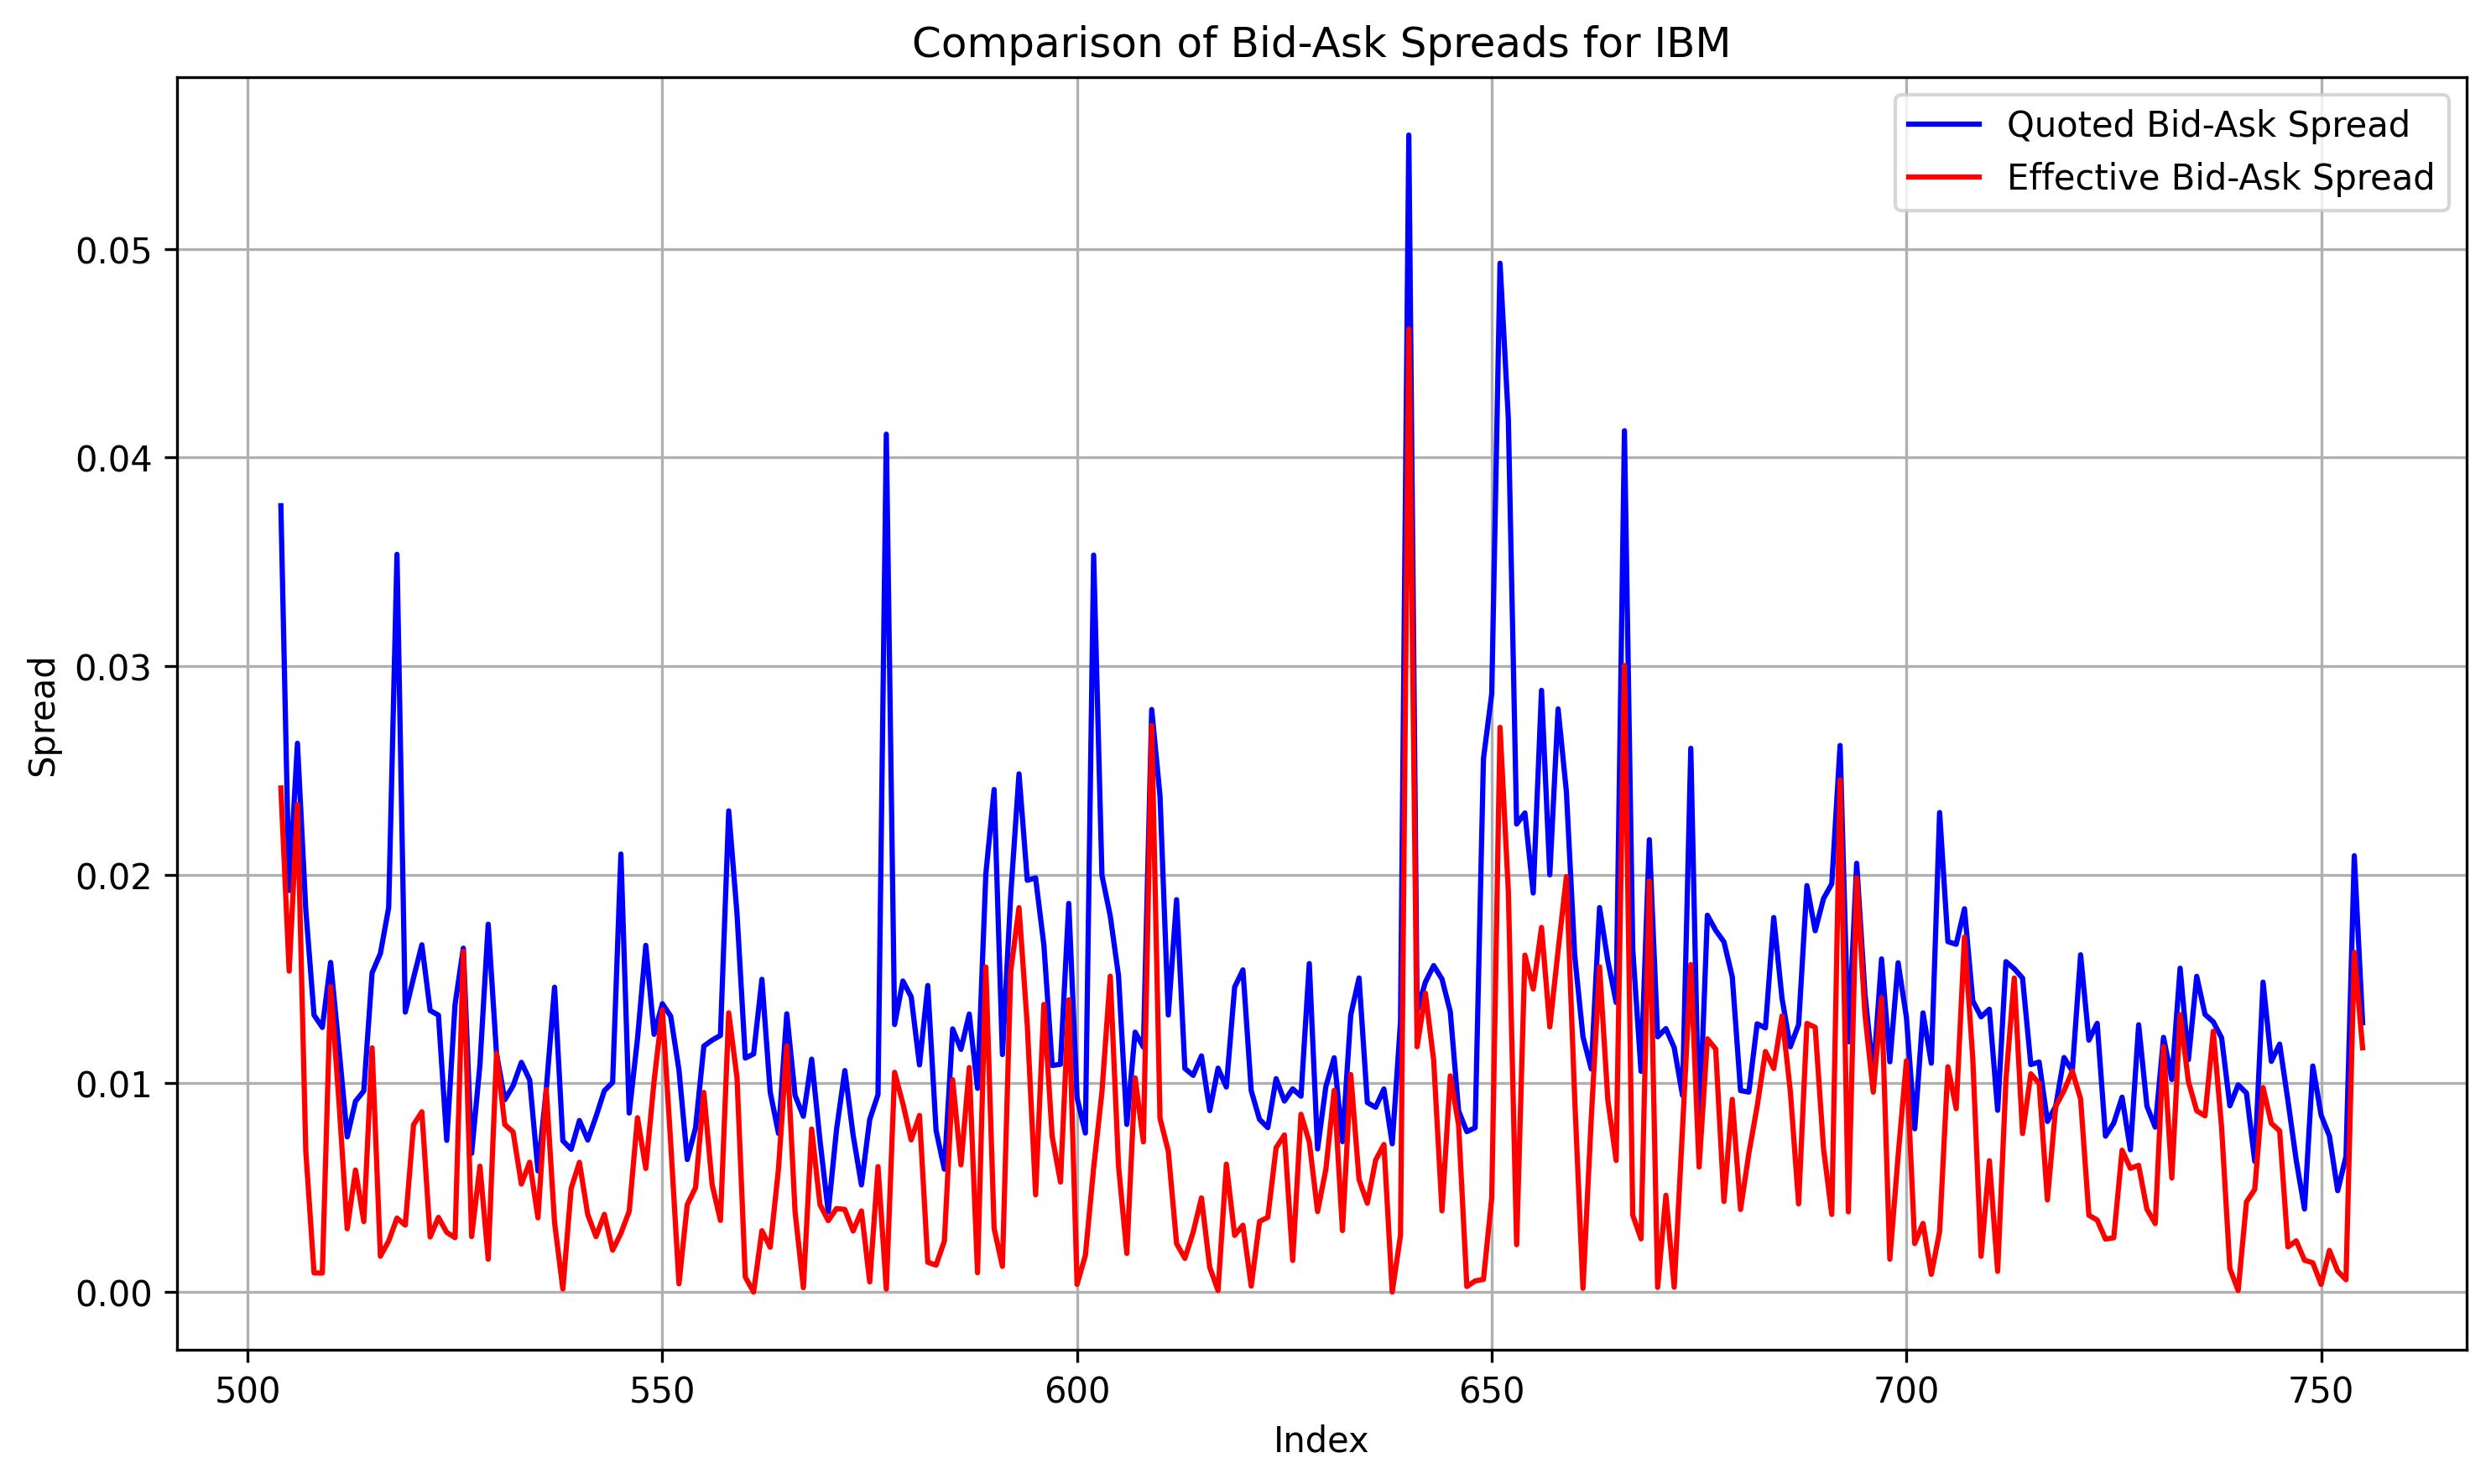

In [ ]:
# Filtrage des données pour le ticker IBM
ibm_data = liq_vol_all[liq_vol_all['TICKER'] == 'IBM']

# Création de la figure et des axes
plt.figure(figsize=(10, 6))

# Tracé du spread de Bid-Ask quoted pour IBM en bleu
plt.plot(ibm_data.index, ibm_data['percent_quoted_ba'], label='Quoted Bid-Ask Spread', color='blue')

# Tracé du spread de Bid-Ask effective pour IBM en vert
plt.plot(ibm_data.index, ibm_data['percent_effective_ba'], label='Effective Bid-Ask Spread', color='red')

# Ajout de titre et légendes
plt.title('Comparison of Bid-Ask Spreads for IBM')
plt.xlabel('Index')
plt.ylabel('Spread')
plt.legend()

# Affichage du graphe
plt.grid(True)
plt.tight_layout()
plt.show()

### Roll's Spread

Ce code calcule une mesure de volatilité basée sur la covariance des variations de prix sur une fenêtre de cinq jours pour chaque ticker unique dans le DataFrame liq_vol_all, puis stocke ces mesures dans la liste roll

In [ ]:
# Convertir la colonne PRC en un type de données approprié (par exemple, float)
liq_vol_all['PRC'] = liq_vol_all['PRC'].astype(float)

# Calculer la différence
liq_vol_all['price_diff'] = liq_vol_all.groupby('TICKER')['PRC'].diff()

# Réinitialiser l'index
liq_vol_all.reset_index(drop=True, inplace=True)

# Supprimer les lignes avec des valeurs manquantes
liq_vol_all.dropna(inplace=True)

# Calculer le spread
roll = []

for j in liq_vol_all['TICKER'].unique():
    for i in range(len(liq_vol_all[liq_vol_all['TICKER'] == j])):
        roll_cov = np.cov(liq_vol_all['price_diff'][i:i+5],
                          liq_vol_all['price_diff'][i+1:i+6])
        if roll_cov[0, 1] < 0:
            roll.append(2 * np.sqrt(-roll_cov[0, 1]))
        else:
            roll.append(2 * np.sqrt(np.abs(roll_cov[0, 1])))

Ce code calcule le spread de Roll pour chaque ticker unique dans le DataFrame liq_vol_all en utilisant une fenêtre de cinq jours pour calculer la covariance des variations de prix, puis stocke les résultats dans une nouvelle DataFrame.

In [ ]:
# Création d'une DataFrame pour stocker les résultats
df_roll_spread = pd.DataFrame({
    'Ticker': [],   # Stocke le symbole boursier (ticker)
    'Roll_Spread': []  # Stocke les valeurs du spread de Roll
})

# Parcours de chaque ticker unique
for ticker in liq_vol_all['TICKER'].unique():
    # Récupération des données pour ce ticker
    ticker_data = liq_vol_all[liq_vol_all['TICKER'] == ticker]['price_diff']
    # Parcours des données pour ce ticker avec une fenêtre de cinq jours
    for i in range(len(ticker_data) - 5):
        # Sélection des variations de prix sur une fenêtre de cinq jours
        price_diff_window = ticker_data.iloc[i:i+5]
        # Calcul de la covariance entre les variations de prix sur cette fenêtre de cinq jours
        roll_cov = np.cov(price_diff_window, ticker_data.iloc[i+1:i+6])
        # Vérification si la covariance est négative
        if roll_cov[0, 1] < 0:
            # Calcul du spread de Roll avec une racine carrée positive
            roll_spread = 2 * np.sqrt(-roll_cov[0, 1])
        else:
            # Calcul du spread de Roll avec la valeur absolue de la covariance
            roll_spread = 2 * np.sqrt(np.abs(roll_cov[0, 1]))
        # Ajout du résultat dans la DataFrame
        #df_roll_spread = df_roll_spread.append({'Ticker': ticker, 'Roll_Spread': roll_spread}, ignore_index=True)
        # Ajout du résultat dans la DataFrame df_roll_spread
        df_roll_spread = pd.concat([df_roll_spread, pd.DataFrame({'Ticker': [ticker], 'Roll_Spread': [roll_spread]})], ignore_index=True)

# Affichage de la DataFrame contenant les résultats
print(df_roll_spread)

    Ticker  Roll_Spread
0     INTC     2.632797
1     INTC     0.540685
2     INTC     0.163768
3     INTC     0.288305
4     INTC     0.381759
..     ...          ...
730    IBM     0.184770
731    IBM     0.358469
732    IBM     0.282489
733    IBM     0.703235
734    IBM     2.171046

[735 rows x 2 columns]


Ce code trace l'évolution du spread de Roll pour le ticker IBM à partir des données fournies dans la DataFrame df_roll_spread, puis affiche le graphique résultant

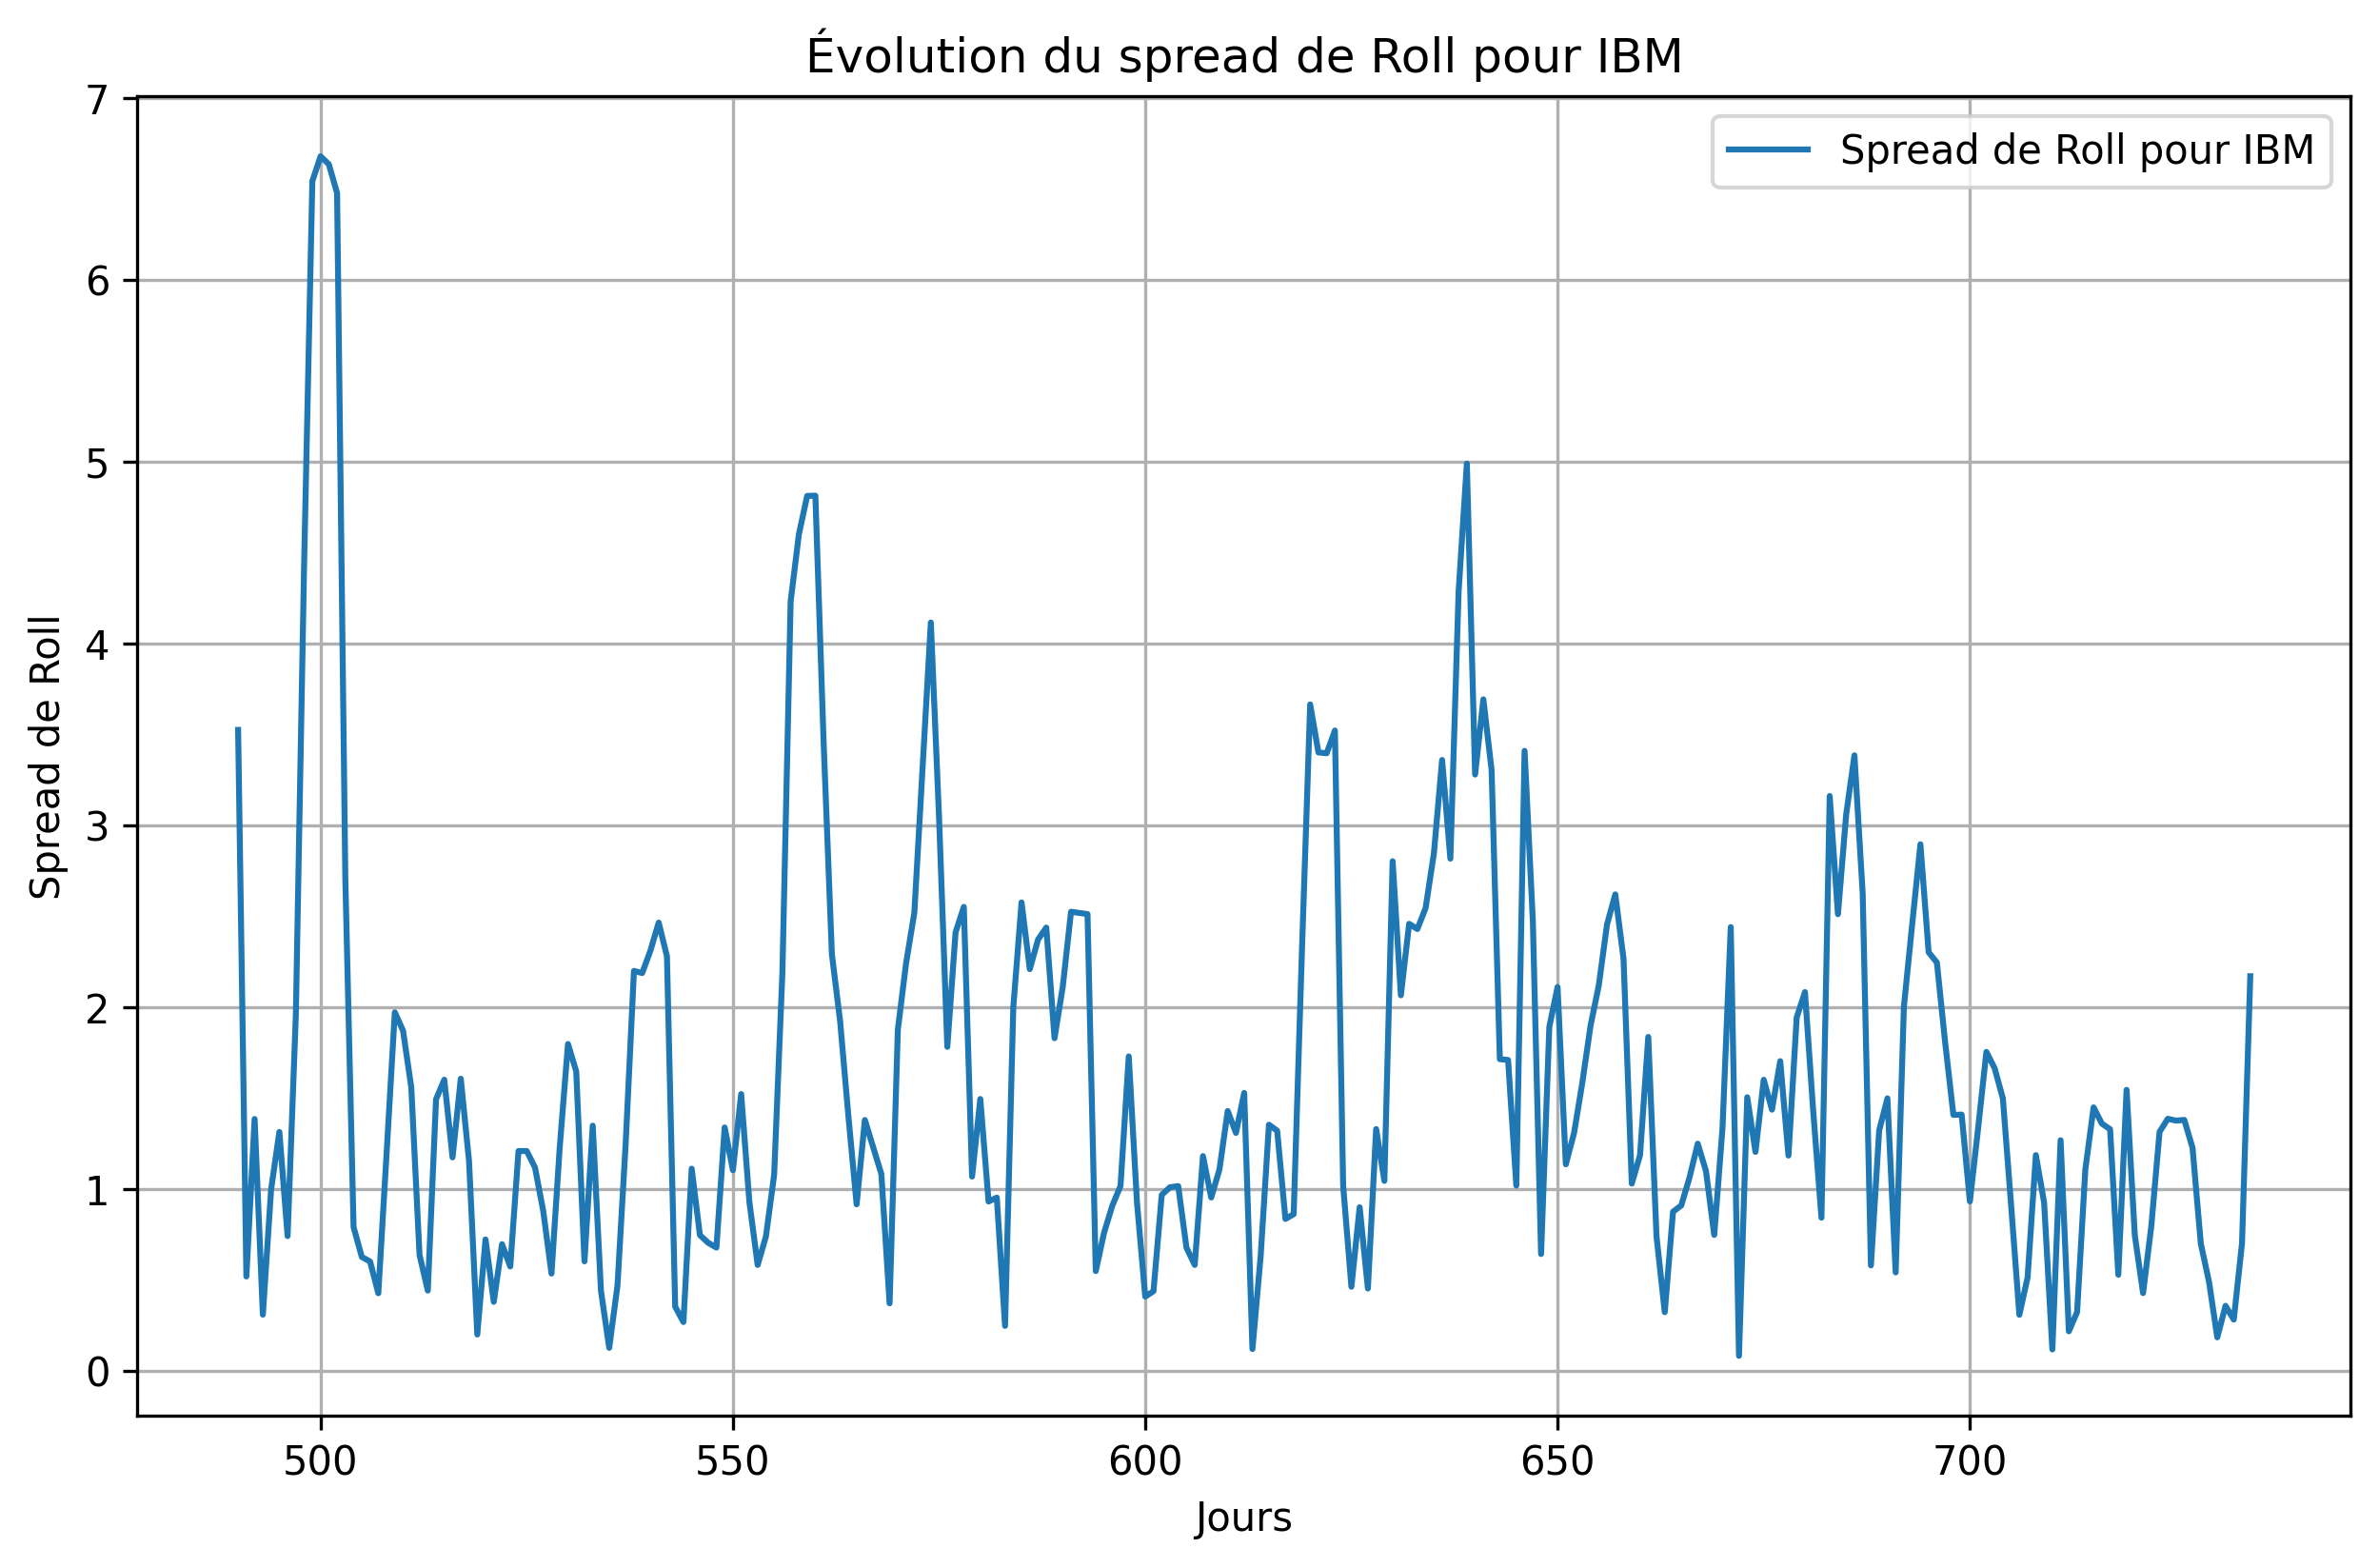

In [ ]:
import matplotlib.pyplot as plt

# Filtrer les données pour le ticker IBM
ibm_data = df_roll_spread[df_roll_spread['Ticker'] == 'IBM']

# Tracer le graphique
plt.figure(figsize=(10, 6))
plt.plot(ibm_data['Roll_Spread'], label='Spread de Roll pour IBM')
plt.xlabel('Jours')
plt.ylabel('Spread de Roll')
plt.title('Évolution du spread de Roll pour IBM')
plt.legend()
plt.grid(True)
plt.show()

### Corwin and Schultz (2012)

Ce code calcule une mesure de l'écart de prix pour chaque ticker unique dans le DataFrame liq_vol_all et stocke ces valeurs dans un tableau NumPy pour une utilisation ultérieure

In [ ]:
gamma = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        gamma.append((max(liq_vol_all['ASKHI'].iloc[i+1],
                          liq_vol_all['ASKHI'].iloc[i]) -
                      min(liq_vol_all['BIDLO'].iloc[i+1],
                          liq_vol_all['BIDLO'].iloc[i])) ** 2)
        gamma_array = np.array(gamma)

Ce code calcule une mesure de dispersion des écarts de prix pour chaque ticker unique dans le DataFrame liq_vol_all et stocke ces valeurs dans un tableau NumPy pour une utilisation ultérieure

In [ ]:
beta = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        beta.append((liq_vol_all['ASKHI'].iloc[i+1] -
                     liq_vol_all['BIDLO'].iloc[i+1]) ** 2 +
                    (liq_vol_all['ASKHI'].iloc[i] -
                     liq_vol_all['BIDLO'].iloc[i]) ** 2)
        beta_array = np.array(beta)

 Ce code utilise les valeurs de dispersion des écarts de prix (beta_array) et de l'écart de prix (gamma_array) pour calculer une mesure appelée "alpha", puis utilise cette mesure pour calculer le "CS spread" pour chaque ticker unique dans le DataFrame.

In [ ]:
alpha = ((np.sqrt(2 * beta_array) - np.sqrt(beta_array)) /
       (3 - (2 * np.sqrt(2)))) - np.sqrt(gamma_array /
                                         (3 - (2 * np.sqrt(2))))
CS_spread = (2 * np.exp(alpha - 1)) / (1 + np.exp(alpha))

Ce code réinitialise l'index du DataFrame liq_vol_all et ajoute deux nouvelles colonnes, 'roll' et 'CS_spread', contenant respectivement les valeurs calculées pour le spread de Roll et le "CS spread".

In [ ]:
liq_vol_all = liq_vol_all.reset_index()
liq_vol_all['roll'] = pd.DataFrame(roll)
liq_vol_all['CS_spread'] = pd.DataFrame(CS_spread)

Ce code trace l'évolution du spread de Corwin-Schultz pour le ticker IBM à partir des données du DataFrame liq_vol_all et affiche le graphique résultant.

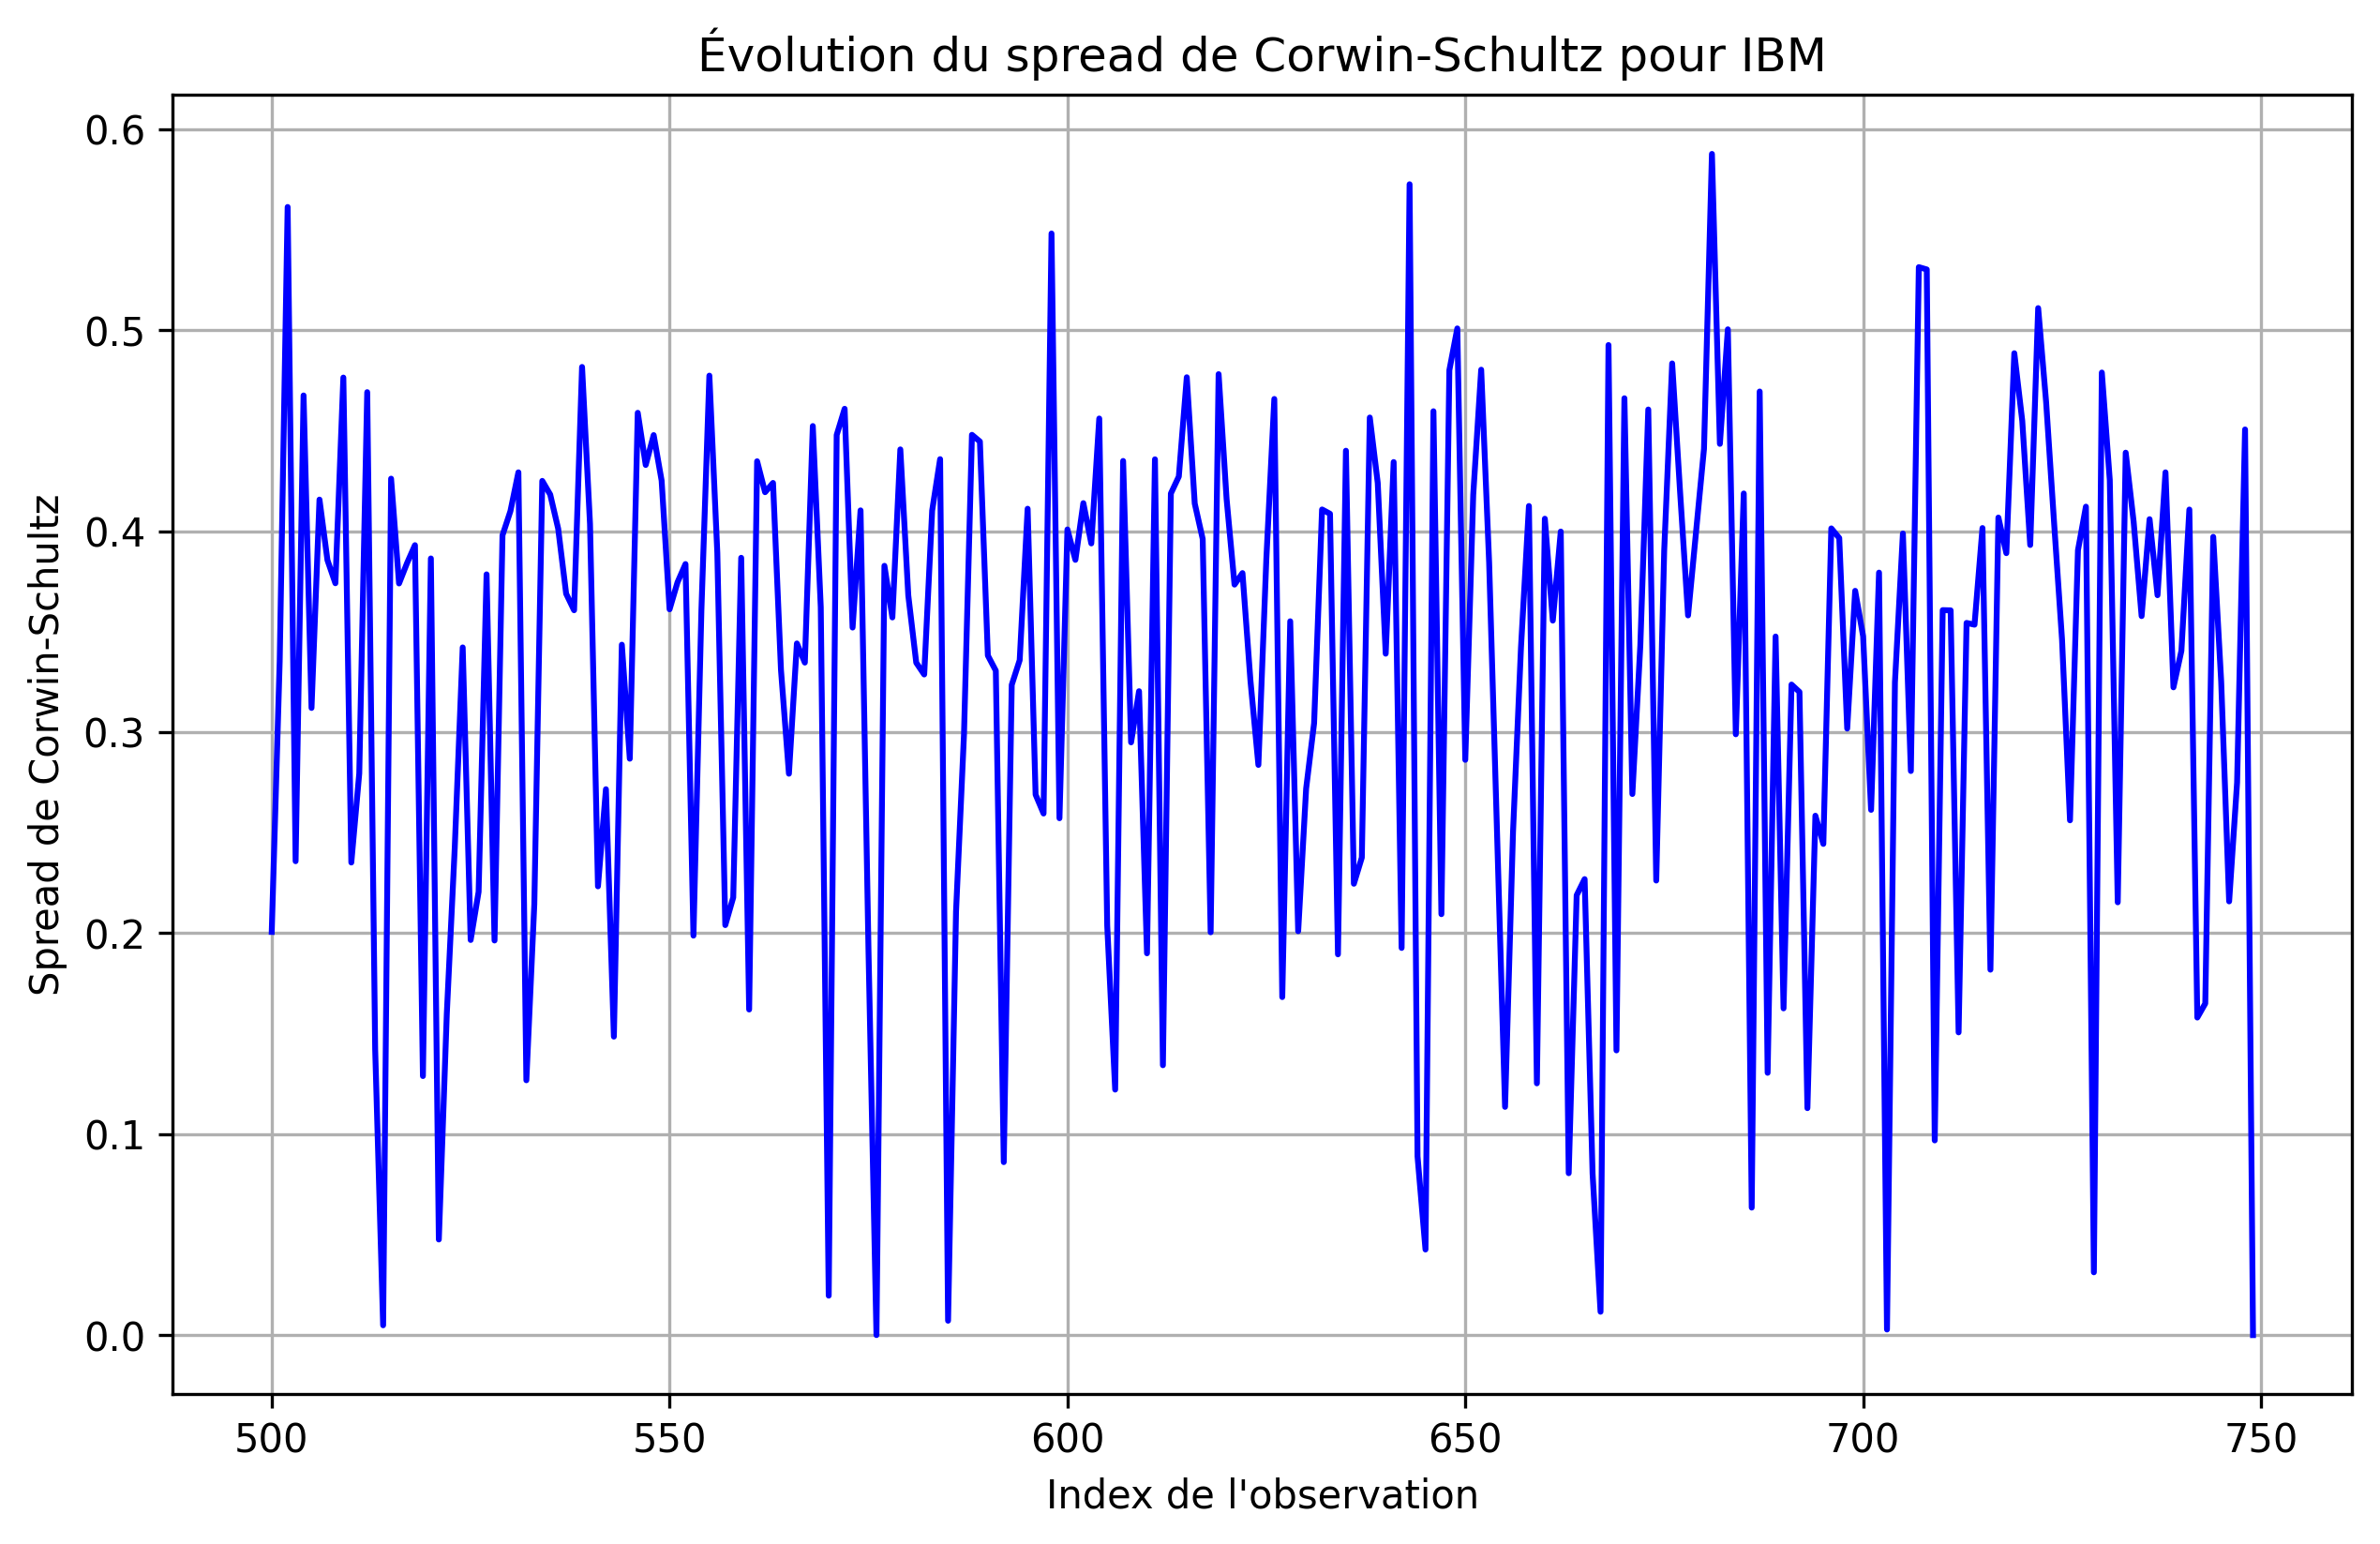

In [ ]:
import matplotlib.pyplot as plt

# Sélection des données pour le ticker IBM
ibm_data = liq_vol_all[liq_vol_all['TICKER'] == 'IBM']

# Création du graphique
plt.figure(figsize=(10, 6))
plt.plot(ibm_data.index, ibm_data['CS_spread'], color='blue', linestyle='-')
plt.title('Évolution du spread de Corwin-Schultz pour IBM')
plt.xlabel('Index de l\'observation')
plt.ylabel('Spread de Corwin-Schultz')
plt.grid(True)
plt.show()

## Price Based Measures

Ce code calcule le volume de négociation dollarisé pour chaque fenêtre de cinq jours pour chaque ticker unique dans le DataFrame liq_vol_all et ajoute ces valeurs dans une nouvelle colonne appelée 'dvol'. Ensuite, il affiche les valeurs de cette colonne.

In [ ]:
dvol = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        dvol.append((liq_vol_all['PRC'][i:i+5] *
                     liq_vol_all['VOL'][i:i+5]).sum())
liq_vol_all['dvol'] = pd.DataFrame(dvol)
print(liq_vol_all['dvol'])

0      6.352709e+09
1      6.237861e+09
2      5.628540e+09
3      5.478125e+09
4      5.484698e+09
           ...     
745    3.528277e+09
746    7.300259e+09
747    1.110204e+10
748    1.389476e+10
749    1.637664e+10
Name: dvol, Length: 750, dtype: float64


Ce code calcule la mesure d'Amihud pour chaque fenêtre de cinq jours pour chaque ticker unique dans le DataFrame liq_vol_all et affiche les valeurs résultantes.

In [ ]:
amihud = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        amihud.append((1 / liq_vol_all['RET'].count()) *
                      (np.sum(np.abs(liq_vol_all['RET'][i:i+1])) /
                              np.sum(liq_vol_all['dvol'][i:i+1])))
print(amihud)

[1.1546360047214091e-14, 1.3116035090050788e-14, 1.1036608908245175e-15, 1.5392128593974457e-15, 1.3749770700943683e-15, 2.871581701642548e-15, 2.0972120913366057e-15, 3.0106129153605127e-15, 1.2369052701433734e-15, 2.391637489886314e-15, 1.3471901487435786e-15, 1.9391929065464006e-15, 2.392777416162749e-15, 8.986232037356114e-16, 4.8136160971207226e-15, 7.270785779532134e-15, 1.2023843217747223e-15, 6.806679014933146e-16, 3.960789717098452e-15, 1.6087728571108261e-15, 7.328445828204661e-15, 2.542790399276158e-15, 1.0620741304331822e-15, 3.610161259181979e-15, 2.358494375930388e-15, 4.0471773939229924e-16, 7.300010451203164e-15, 2.527507927456987e-15, 1.875438297776124e-15, 4.000054452653511e-15, 1.217126053560152e-15, 4.6692486486572436e-17, 9.613253467573409e-17, 5.057237478119711e-15, 3.2006653307108923e-15, 6.64272457661459e-16, 4.831817990964894e-17, 1.3937367982103038e-15, 1.7092001014744432e-15, 3.2598756009716625e-15, 1.3529581689803311e-15, 3.830832391836131e-15, 1.65029416788

Ce code calcule la mesure de Florackis pour chaque fenêtre de cinq jours pour chaque ticker unique dans le DataFrame liq_vol_all.

In [ ]:
florackis = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        florackis.append((1 / liq_vol_all['RET'].count()) *
                         (np.sum(np.abs(liq_vol_all['RET'][i:i+1]) /
                                 liq_vol_all['turnover_ratio'][i:i+1])))
print(florackis)

[0.007846692054531864, 0.007970014805940942, 0.0009431810005519473, 0.0012804599523617548, 0.0011541279122822727, 0.001938648404794069, 0.0016131047970667526, 0.0028423636044658924, 0.0010594460935530734, 0.0023352807439171314, 0.0018646127498296071, 0.002287966689221788, 0.0033175751842774385, 0.0016593525110461889, 0.0034531792705764434, 0.0028661765946678343, 0.000885216151036142, 0.0007878695203412243, 0.003617384863681863, 0.000931873039345305, 0.004143384587233538, 0.002183941944870972, 0.0008590161818862937, 0.0021884667245686343, 0.0019079861459118971, 0.0003610319438636368, 0.006399070212761705, 0.002358021295327478, 0.0017458977925772076, 0.003372376071103659, 0.0014652393458592652, 4.0957160900101776e-05, 0.00010924227050112812, 0.002983549123367775, 0.0025454009497444144, 0.000690742940718073, 4.8469696553468075e-05, 0.0012972348049053368, 0.0015864657610059109, 0.0025060584879741067, 0.001038544423685756, 0.004188341895240801, 0.00165840414024147, 0.0006162337103209027, 0.

Ce code crée deux nouvelles colonnes dans le DataFrame liq_vol_all : 'vol_diff_pct' pour stocker la variation en pourcentage du volume de transactions et 'price_diff_pct' pour stocker la variation en pourcentage du prix, calculées pour chaque ticker.

In [ ]:
liq_vol_all['VOL'] = liq_vol_all['VOL'].astype(float)
liq_vol_all['vol_diff_pct'] = liq_vol_all.groupby('TICKER')['VOL'].diff()
liq_vol_all['price_diff_pct'] = liq_vol_all.groupby('TICKER')['PRC'].diff()

Ce code calcule le CET pour chaque fenêtre de cinq jours pour chaque ticker unique dans le DataFrame liq_vol_all

In [ ]:
cet = []

for j in liq_vol_all.TICKER.unique():
    for i in range(len(liq_vol_all[liq_vol_all.TICKER == j])):
        cet.append(np.sum(liq_vol_all['vol_diff_pct'][i:i+1])/
                   np.sum(liq_vol_all['price_diff_pct'][i:i+1]))
print(cet)

[nan, 1159611.3553113567, -57703813.63636393, -12523.333333333156, -650551.8518518615, 8436516.363636298, -14747524.324324427, 4384105.172413806, 13072440.0, 7239389.361702145, -4773758.823529463, 17276029.166666694, 4273856.521739156, 21152169.696969353, 17374882.417582415, -13188421.323529417, 153115436.36363715, 88148599.99999912, 5988702.0, -38217076.19047604, -3475770.186335405, -33695167.34693864, 1117763.235294118, -9225674.626865648, 23052205.128205515, 11840385.714285666, 14825.806451612965, -714489.1304347813, -559535.2941176414, 5876004.705882392, 26599219.230769433, -601135400.0001196, -272019250.0000541, 14607874.999999927, -18397859.01639346, -35617992.307693556, 151719599.9999224, -2837896.428571417, -97017.64705882459, 5272829.687499995, 2616538.4615384815, 8657620.547945242, -9569628.571428532, 10737174.999999594, 2486143.678160907, 8289731.818181861, 5921918.750000021, -1200481.7204301078, 22261099.999999985, 131180413.04348004, 28498899.999999885, -17198894.285714217

Ce code étend le DataFrame liq_vol_all avec trois nouvelles colonnes contenant les valeurs calculées pour différents indicateurs de liquidité financière.

In [ ]:
liq_vol_all['amihud'] = pd.DataFrame(amihud)
liq_vol_all['florackis'] = pd.DataFrame(florackis)
liq_vol_all['cet'] = pd.DataFrame(cet)

## Market Impact Measures

In [ ]:
import statsmodels.api as sm

Ce code calcule la variation en pourcentage du volume de transactions, supprime les lignes avec des valeurs manquantes dans cette colonne, et réinitialise l'index du DataFrame.

In [ ]:
liq_vol_all['VOL_pct_change'] = liq_vol_all.groupby('TICKER')['VOL'].pct_change()
liq_vol_all.dropna(subset=['VOL_pct_change'], inplace=True)
liq_vol_all = liq_vol_all.reset_index()

Ce code calcule les résidus des régressions linéaires entre les rendements des différents tickers et le rendement du marché.

In [ ]:
unsys_resid = []

for i in liq_vol_all.TICKER.unique():
    X1 = liq_vol_all[liq_vol_all['TICKER'] == i]['vwretx']
    y = liq_vol_all[liq_vol_all['TICKER'] == i]['RET']
    ols = sm.OLS(y, X1).fit()
    unsys_resid.append(ols.resid)

Ce code semble calculer l'impact sur le marché pour chaque ticker unique.

In [ ]:
market_impact = {}

for i, j in zip(liq_vol_all.TICKER.unique(),
                range(len(liq_vol_all['TICKER'].unique()))):
    X2 = liq_vol_all[liq_vol_all['TICKER'] == i]['VOL_pct_change']
    ols = sm.OLS(unsys_resid[j] ** 2, X2).fit()
    print('***' * 30)
    print(f'OLS Result for {i}')
    print(ols.summary())
    market_impact[j] = ols.resid

******************************************************************************************
OLS Result for INTC
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.157
Model:                            OLS   Adj. R-squared (uncentered):              0.154
Method:                 Least Squares   F-statistic:                              46.31
Date:                Sun, 07 Apr 2024   Prob (F-statistic):                    7.53e-11
Time:                        16:52:50   Log-Likelihood:                          1444.9
No. Observations:                 249   AIC:                                     -2888.
Df Residuals:                     248   BIC:                                     -2884.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
         

Ce code semble fusionner les séries temporelles des résidus d'impact sur le marché obtenues à partir des régressions linéaires effectuées précédemment pour chaque ticker unique.

In [ ]:
append1 = pd.concat([market_impact[0], market_impact[1]])
append1 = pd.concat([append1, market_impact[2]])
# Assignation de la nouvelle Series à la colonne 'market_impact' de la DataFrame `liq_vol_all`
liq_vol_all['market_impact'] = append1

liq_vol_all.drop(liq_vol_all[cols], axis=1) supprime les colonnes spécifiées dans la liste cols du DataFrame liq_vol_all.

.iloc[:, -11:] sélectionne les 11 dernières colonnes restantes après suppression des colonnes spécifiées.

liq_measures_all.dropna(inplace=True) supprime toutes les lignes contenant des valeurs manquantes dans le DataFrame résultant.

Enfin, .describe().T génère un résumé statistique des données dans le DataFrame transposé, fournissant des statistiques descriptives telles que la moyenne, l'écart type, les quantiles, etc.

In [ ]:
cols = ['vol_diff_pct', 'price_diff_pct', 'price_diff',
        'VOL_pct_change', 'dvol', 'mid_price']
liq_measures_all = liq_vol_all.drop(liq_vol_all[cols], axis=1)\
                   .iloc[:, -11:]
liq_measures_all.dropna(inplace=True)
liq_measures_all.describe().T

,count,mean,std,min,25%,50%,75%,max
liq_ratio,744.0,7.347100e+10,2.558890e+11,8.065402e+08,1.382476e+10,2.261858e+10,4.511168e+10,3.095986e+12
Lhh,744.0,3.319816e-05,5.350280e-05,3.966368e-06,1.690235e-05,2.346367e-05,3.554496e-05,5.824148e-04
turnover_ratio,744.0,6.517786e-03,2.841959e-03,1.916371e-03,4.911828e-03,5.773868e-03,7.505314e-03,2.542853e-02
percent_quoted_ba,744.0,1.573118e-02,7.652821e-03,3.779877e-03,1.044108e-02,1.383684e-02,1.881660e-02,5.545110e-02
percent_effective_ba,744.0,8.369443e-03,7.152192e-03,0.000000e+00,3.025503e-03,6.854441e-03,1.153394e-02,4.656669e-02
roll,744.0,8.153334e-01,6.054462e-01,7.615773e-02,4.568121e-01,6.896537e-01,1.010069e+00,4.178873e+00
CS_spread,744.0,3.312749e-01,1.254490e-01,1.773438e-40,2.484208e-01,3.609800e-01,4.187938e-01,5.877726e-01
amihud,744.0,2.839537e-15,2.405933e-15,4.669249e-17,1.145134e-15,2.271212e-15,3.811297e-15,1.320828e-14
florackis,744.0,2.327243e-03,1.592555e-03,4.095716e-05,1.098625e-03,2.029014e-03,3.342120e-03,7.970015e-03
cet,744.0,3.266051e+06,1.009212e+08,-6.011354e+08,-8.758370e+06,-5.951669e+05,9.402566e+06,1.276043e+09


## GMM

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

liq_measures_all.dropna() supprime toutes les lignes contenant des valeurs manquantes dans le DataFrame liq_measures_all. Cela garantit que nous travaillons avec un DataFrame complet sans valeurs manquantes.

StandardScaler().fit_transform(liq_measures_all2) standardise les données dans le DataFrame liq_measures_all2. La standardisation implique de centrer les données autour de zéro (en soustrayant la moyenne) et de les mettre à l'échelle en divisant par l'écart type. Cela permet de rendre les données comparables et facilite l'analyse des modèles prédictifs ou des algorithmes d'apprentissage automatique.

In [ ]:
liq_measures_all2 = liq_measures_all.dropna()
scaled_liq = StandardScaler().fit_transform(liq_measures_all2)

Ce code crée un histogramme qui compare la distribution de trois mesures de liquidité différentes (percent_quoted_ba, turnover_ratio, et market_impact) présentes dans le DataFrame liq_measures_all.

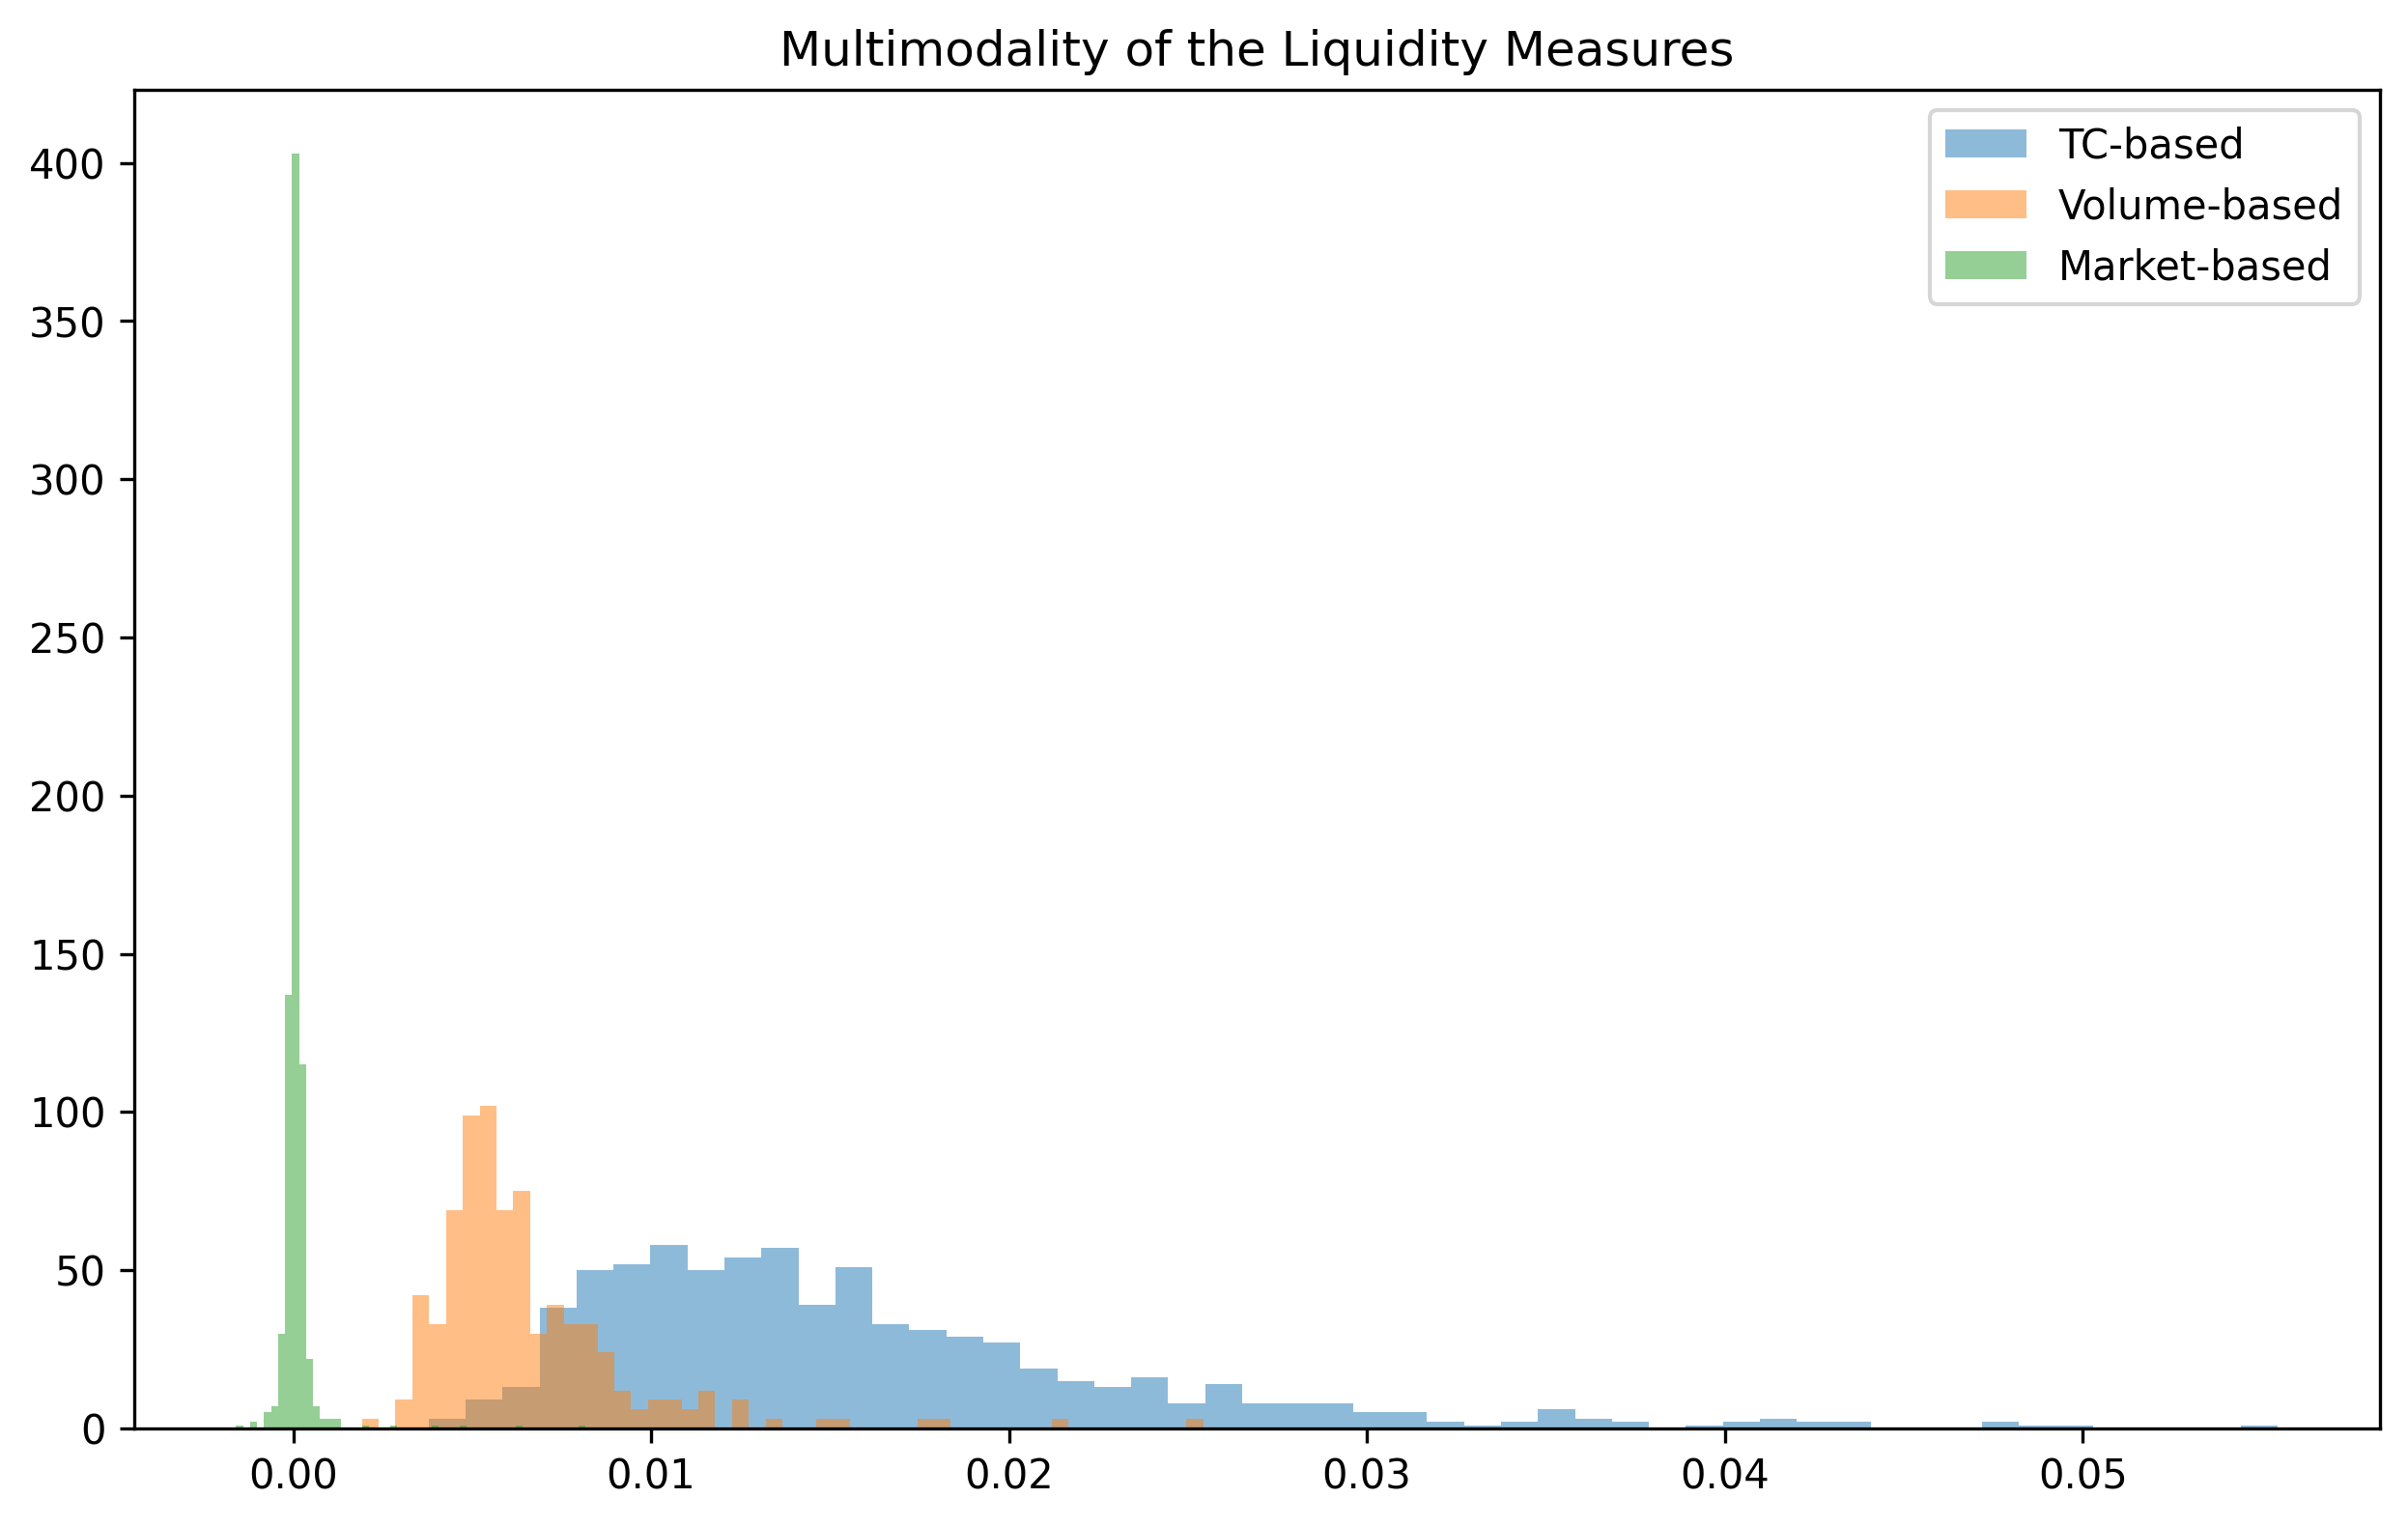

In [ ]:
kwargs = dict(alpha=0.5, bins=50,  stacked=True)
plt.hist(liq_measures_all.loc[:, 'percent_quoted_ba'],
         **kwargs, label='TC-based')
plt.hist(liq_measures_all.loc[:, 'turnover_ratio'],
         **kwargs, label='Volume-based')
plt.hist(liq_measures_all.loc[:, 'market_impact'],
         **kwargs, label='Market-based')
plt.title('Multimodality of the Liquidity Measures')
plt.legend()
plt.show()

Ce code effectue une analyse pour déterminer le nombre optimal de composants (clusters) à utiliser dans un modèle de mélange gaussien

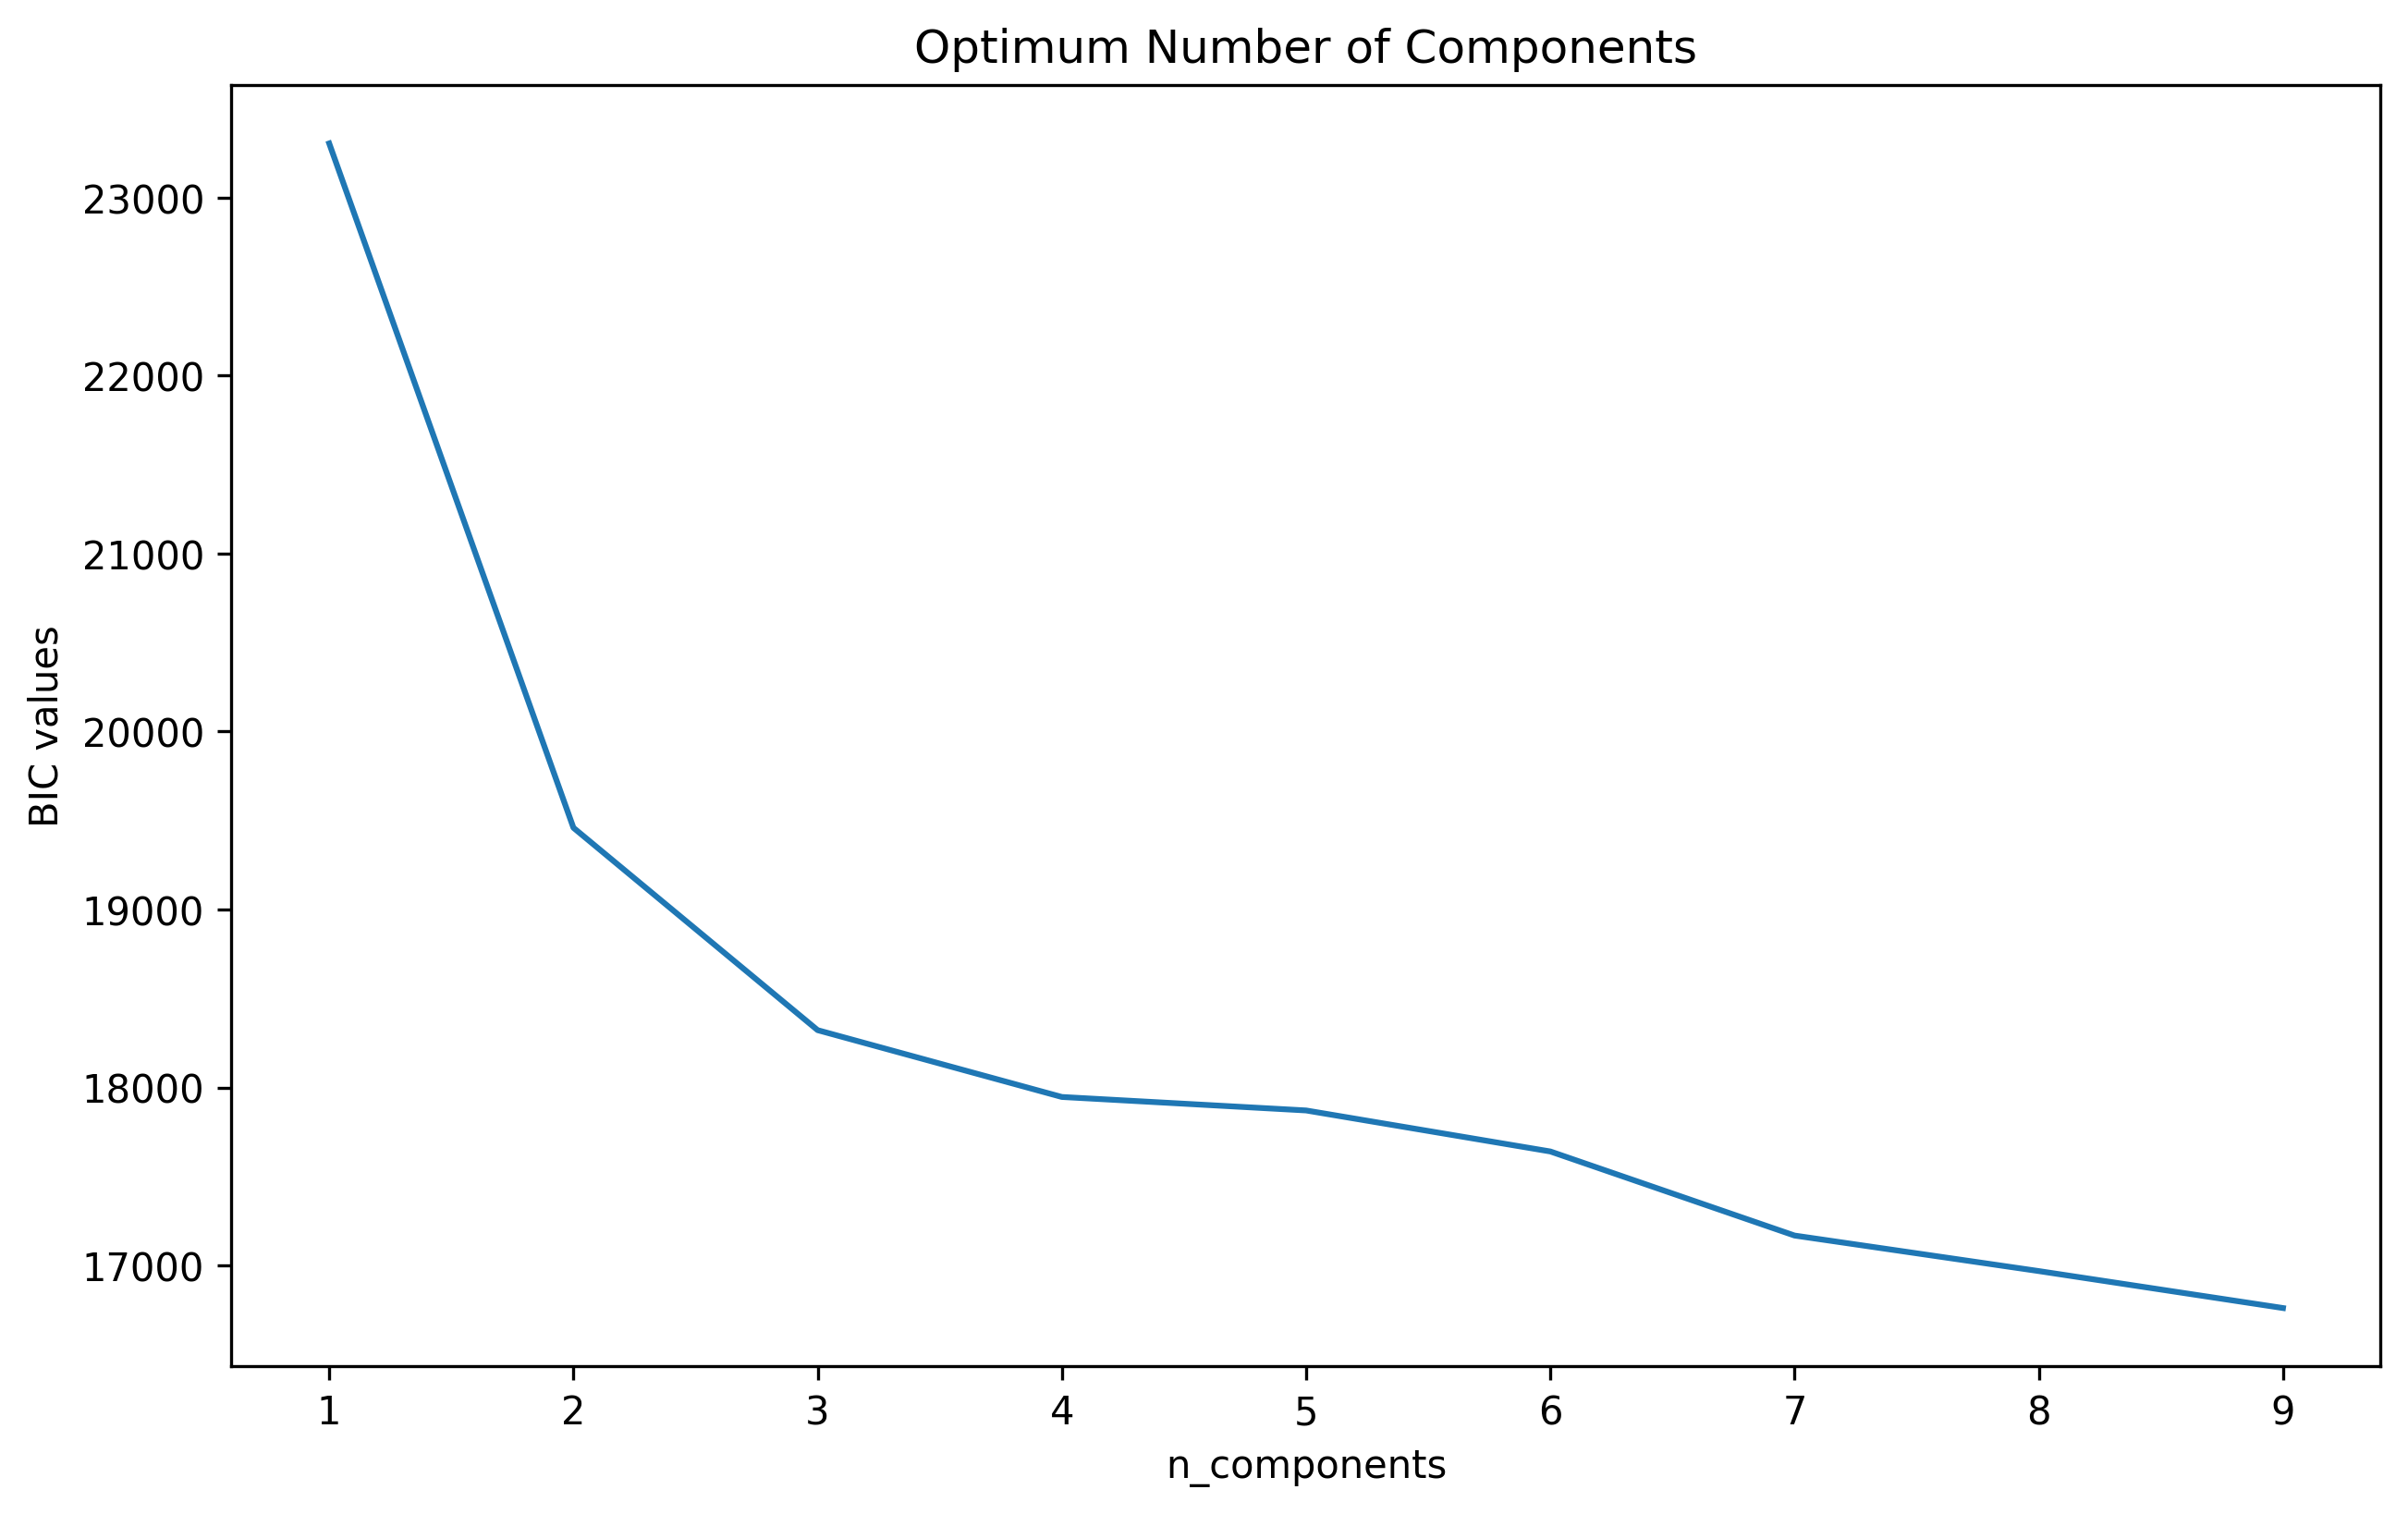

In [ ]:
n_components = np.arange(1, 10)
clusters = [GaussianMixture(n, covariance_type='spherical',
                            random_state=0).fit(scaled_liq)
          for n in n_components]
plt.plot(n_components, [m.bic(scaled_liq) for m in clusters])
plt.title('Optimum Number of Components')
plt.xlabel('n_components')
plt.ylabel('BIC values')
plt.show()


Ce code définit une fonction cluster_state qui utilise un modèle de mélange gaussien  pour effectuer une analyse de clustering sur les données passées en argument. La fonction prend également le nombre d'états comme paramètre pour spécifier le nombre de clusters souhaité.La fonction renvoie les probabilités d'appartenance à chaque état pour chaque échantillon.

In [ ]:
def cluster_state(data, nstates):
    gmm = GaussianMixture(n_components=nstates,
                          covariance_type='spherical',
                          init_params='kmeans')
    gmm_fit = gmm.fit(scaled_liq)
    labels = gmm_fit.predict(scaled_liq)
    state_probs = gmm.predict_proba(scaled_liq)
    state_probs_df = pd.DataFrame(state_probs,
                                  columns=['state-1','state-2','state-3'])
    state_prob_means = [state_probs_df.iloc[:, i].mean()
                        for i in range(len(state_probs_df.columns))]
    if np.max(state_prob_means) == state_prob_means[0]:
        print('State-1 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[0]))
    elif np.max(state_prob_means) == state_prob_means[1]:
        print('State-2 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[1]))
    else:
        print('State-3 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[2]))
    return state_probs

Ce code utilise la fonction cluster_state pour effectuer une analyse de clustering sur les données scaled_liq avec un nombre de clusters spécifié de 3. Ensuite, il calcule les probabilités moyennes d'appartenance à chaque état (cluster) à partir des probabilités renvoyées par la fonction cluster_state, en prenant la moyenne le long de l'axe des échantillons. Enfin, il affiche les probabilités moyennes pour chaque état.

In [ ]:
state_probs = cluster_state(scaled_liq, 3)
print(f'State probabilities are {state_probs.mean(axis=0)}')

State-2 is likely to occur with a probability of 0.547893
State probabilities are [0.07603833 0.5478926  0.37606907]


In [ ]:
from sklearn.decomposition import PCA

Ce code utilise l'analyse en composantes principales (PCA) pour transformer les données scaled_liq en un nouvel espace de variables décorrélées appelées composantes principales. Ensuite, il trace le graphique de l'importance de chaque composante principale en termes de pourcentage de variance expliquée. Ce graphique est souvent appelé un "Scree Plot" et est utilisé pour déterminer le nombre optimal de composantes principales à conserver.

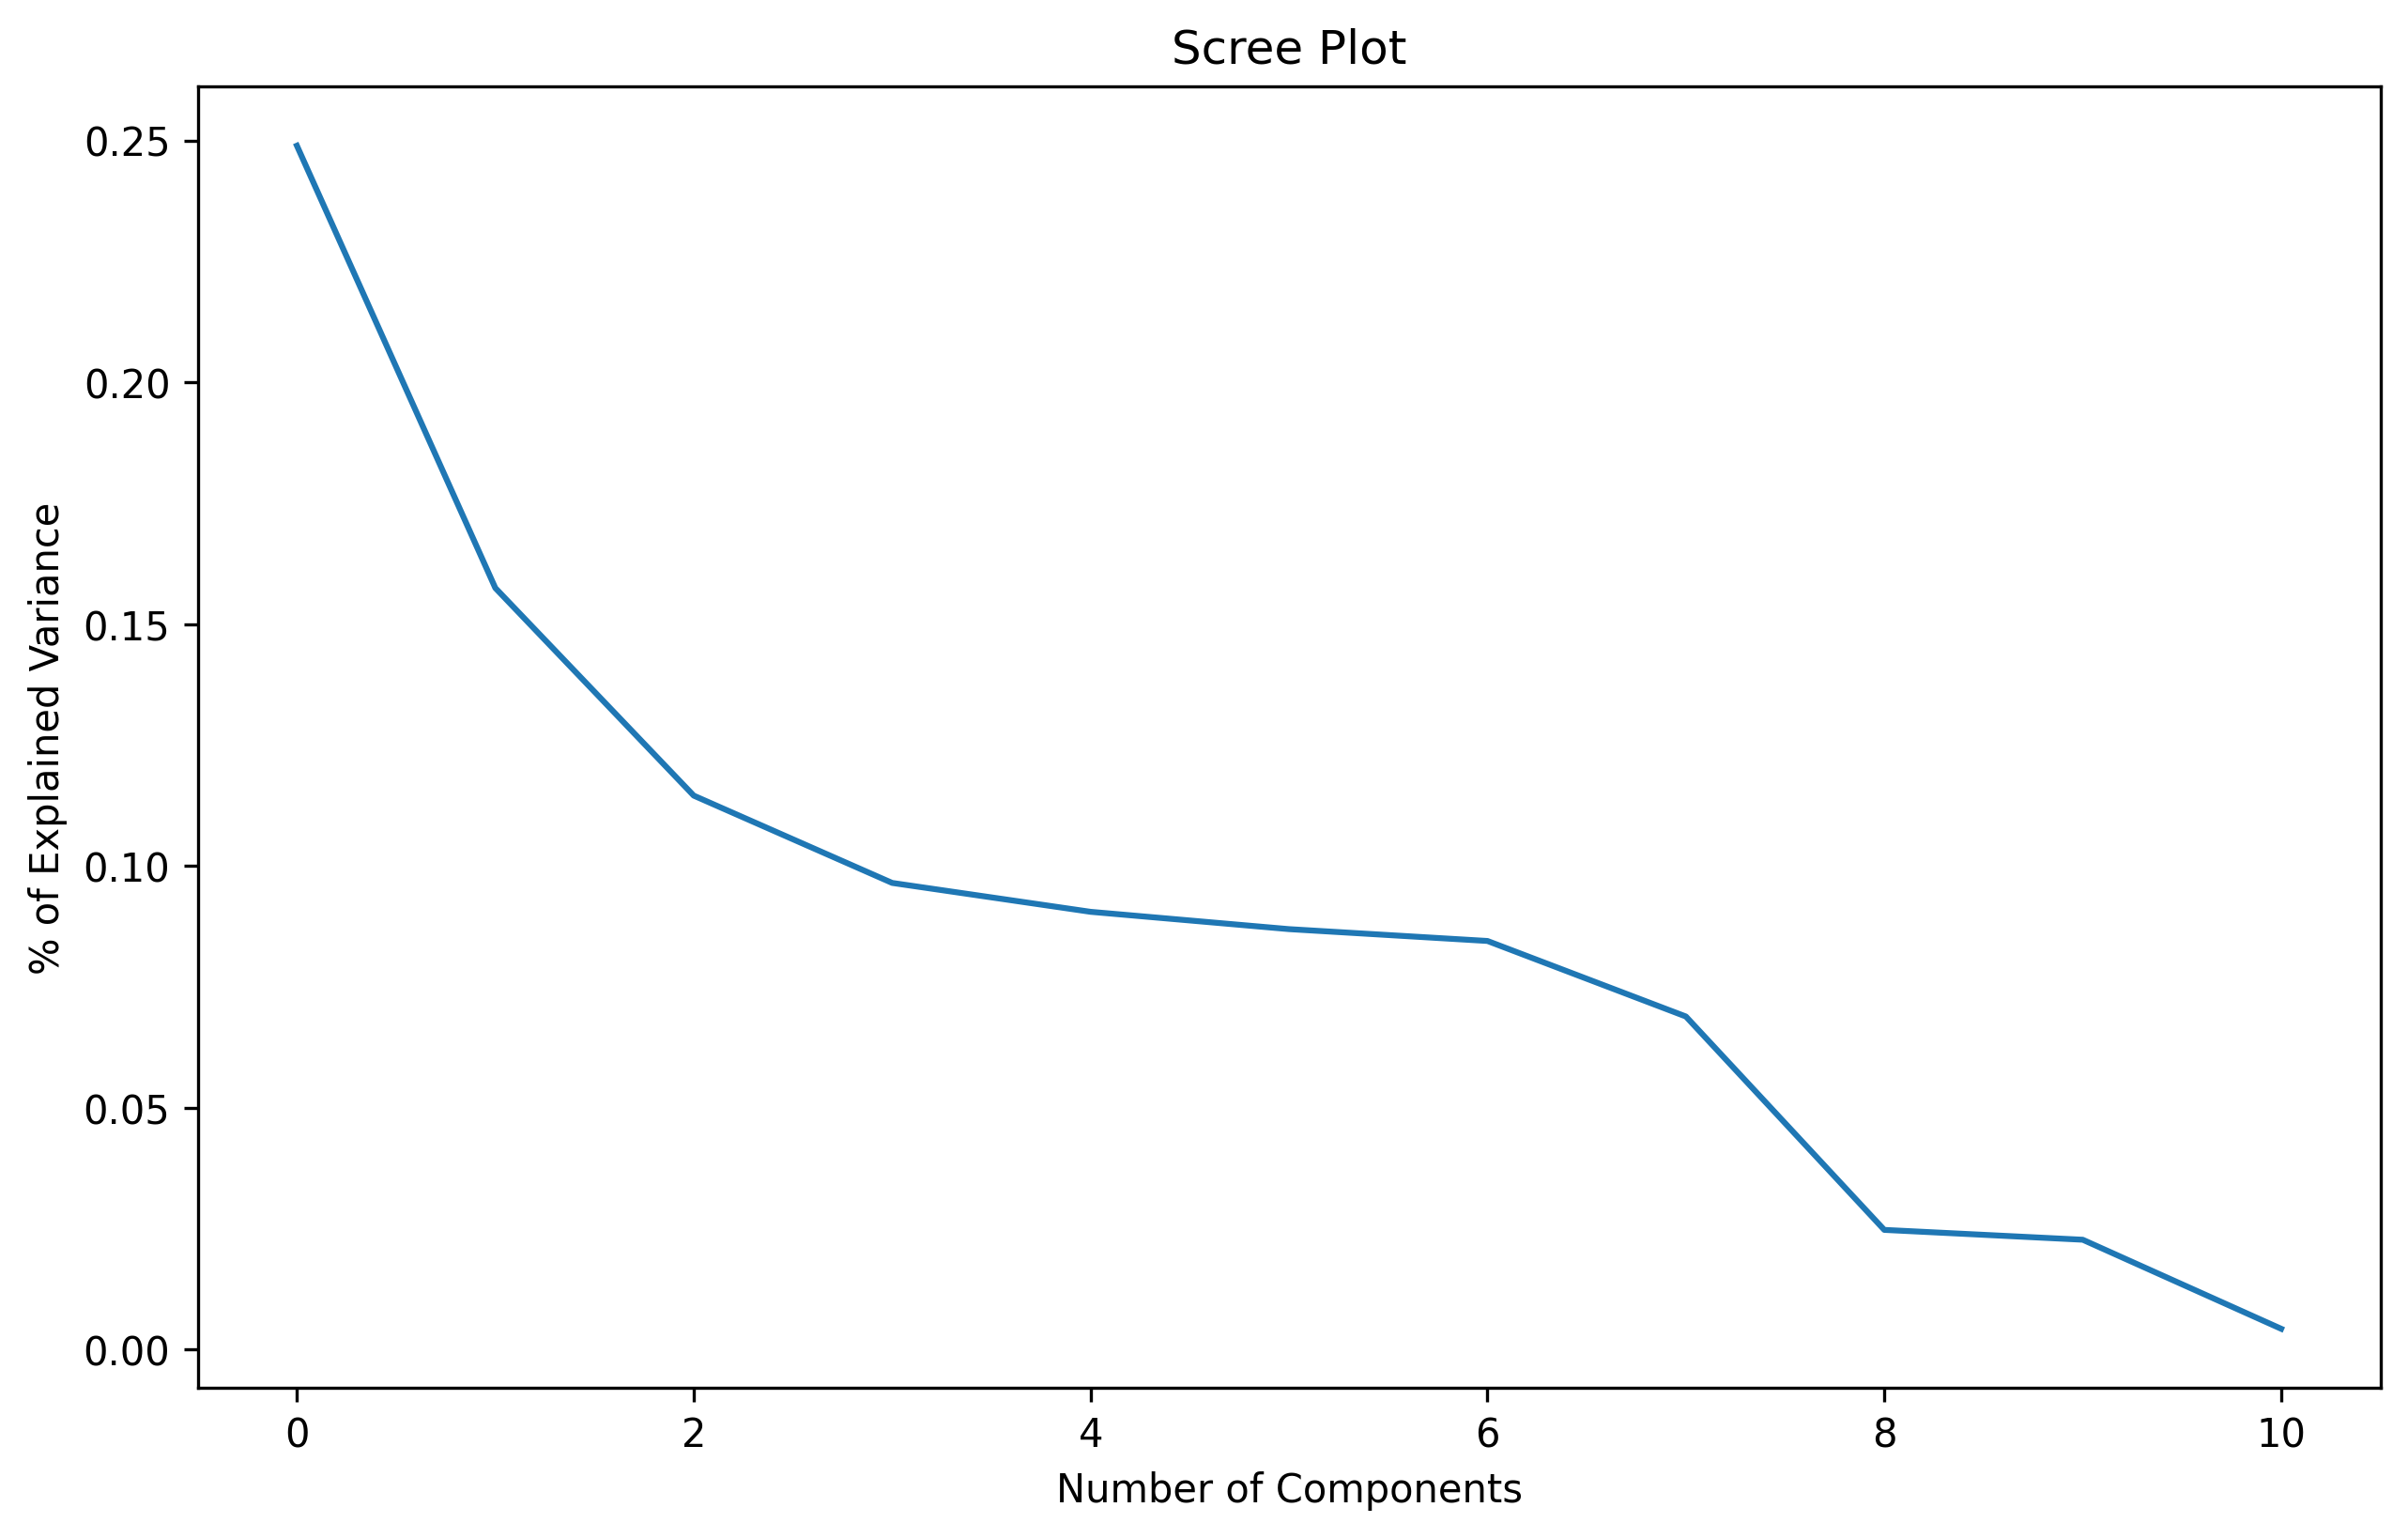

In [ ]:
pca = PCA(n_components=11)
components = pca.fit_transform(scaled_liq)
plt.plot(pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('% of Explained Variance')
plt.show()

Ce code effectue une analyse en composantes principales (PCA) sur les données data, en réduisant les dimensions à 3 composantes principales. Ensuite, il applique un modèle de mélange gaussien (GMM) avec nstate états cachés sur ces composantes principales. Le modèle GMM est ajusté aux données réduites, puis les probabilités d'appartenance à chaque état caché sont calculées à l'aide de la méthode predict_proba. Finalement, il retourne à la fois les probabilités des états cachés et l'objet PCA pour permettre une analyse plus approfondie si nécessaire.

In [ ]:
def gmm_pca(data, nstate):
    pca = PCA(n_components=3)
    components = pca.fit_transform(data)
    mxtd = GaussianMixture(n_components=nstate,
                           covariance_type='spherical')
    gmm = mxtd.fit(components)
    labels = gmm.predict(components)
    state_probs = gmm.predict_proba(components)
    return state_probs,pca

Ce code applique la fonction gmm_pca aux données scaled_liq avec nstate égal à 3. Ensuite, il affiche les probabilités moyennes des états cachés en prenant la moyenne le long de l'axe 0 de la matrice state_probs. Ces probabilités moyennes indiquent la probabilité moyenne d'observation appartenant à chaque état caché.

In [ ]:
state_probs, pca = gmm_pca(scaled_liq, 3)
print(f'State probabilities are {state_probs.mean(axis=0)}')

State probabilities are [0.73184985 0.25202112 0.01612902]


Ce code définit une fonction wpc qui calcule les probabilités moyennes des états cachés à partir de la matrice state_probs et affiche ensuite l'état le plus probable avec sa probabilité moyenne. Ensuite, il appelle cette fonction.

In [ ]:
def wpc():
    state_probs_df = pd.DataFrame(state_probs,
                                  columns=['state-1', 'state-2',
                                           'state-3'])
    state_prob_means = [state_probs_df.iloc[:, i].mean()
                        for i in range(len(state_probs_df.columns))]
    if np.max(state_prob_means) == state_prob_means[0]:
        print('State-1 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[0]))
    elif np.max(state_prob_means) == state_prob_means[1]:
        print('State-2 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[1]))
    else:
        print('State-3 is likely to occur with a probability of {:4f}'
              .format(state_prob_means[2]))
wpc()

State-1 is likely to occur with a probability of 0.731850


Ce code calcule la matrice de chargement (loading matrix) à partir des composantes principales (principal components) obtenues après l'analyse en composantes principales (PCA). La matrice de chargement est calculée en multipliant les composantes principales par la racine carrée des valeurs propres correspondantes (explained variance). Ensuite, il crée un DataFrame contenant cette matrice de chargement, avec les noms des variables d'entrée en tant qu'index et les noms des composantes principales (PC1, PC2, PC3) en tant que colonnes.

In [ ]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loading_matrix = pd.DataFrame(loadings,
                              columns=['PC1', 'PC2', 'PC3'],
                              index=liq_measures_all.columns)
loading_matrix

,PC1,PC2,PC3
liq_ratio,0.102681,-0.106022,-0.162785
Lhh,-0.202099,0.886449,-0.111913
turnover_ratio,0.597534,-0.007831,0.064610
percent_quoted_ba,0.728577,0.113598,0.526955
percent_effective_ba,0.661199,0.120841,0.483860
roll,-0.071322,0.891373,-0.036944
CS_spread,-0.002469,-0.293144,-0.039448
amihud,0.852227,-0.007342,-0.489080
florackis,0.717594,0.097076,-0.603776
cet,0.017150,0.112121,0.147144


## GMCM

In [ ]:
!pip install copulae

In [ ]:
from copulae.mixtures.gmc.gmc import GaussianMixtureCopula

In [ ]:
_, dim = scaled_liq.shape
gmcm = GaussianMixtureCopula(n_clusters=3, ndim=dim)

Ce code utilise le modèle de mélange gaussien pour les données pour ajuster les données mises à l'échelle scaled_liq. Il utilise la méthode de clustering K-means avec le critère GMCM et une tolérance (eps) de 0.0001. Ensuite, il extrait les probabilités d'appartenance à chaque état à partir des paramètres ajustés du modèle et imprime le numéro de l'état le plus probable ainsi que les probabilités d'appartenance à chaque état.

In [ ]:
gmcm_fit = gmcm.fit(scaled_liq, method='kmeans',
                    criteria='GMCM', eps=0.0001)
state_prob = gmcm_fit.params.prob
print(f'The state {np.argmax(state_prob) + 1} is likely to occur')
print(f'State probabilities based on GMCM are {state_prob}')

The state 2 is likely to occur
State probabilities based on GMCM are [0.34139785 0.34274194 0.31586022]
